# To do
1. Loading data
2. Import packages
3. Statistical analysis

# Loading data

In [1]:
import pandas as pd

In [2]:
path_features = 'data/training_set_features.csv'
path_targets = 'data/training_set_labels.csv'

In [3]:
df_fts = pd.read_csv(path_features, index_col = 'respondent_id')
df_tgs = pd.read_csv(path_targets, index_col = 'respondent_id')

In [4]:
df = df_tgs.merge(df_fts, on = 'respondent_id', indicator = True)

## Sanity check after merging

- .merge(indicator = True)
- df['merge'].value_counts()
- merge how = 'inner'
- all both 26707
- It indicates one to one data relation

In [5]:
df['_merge'].value_counts()

_merge
both          26707
left_only         0
right_only        0
Name: count, dtype: int64

# Statistical analysis

- Distribution
- Mssing data : any relation with demography? any patterns?

In [39]:
import matplotlib.pyplot as plt
import numpy as np

## Overal percentage of all the columns

In [42]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', '_merge'],
      dtype='object')

In [43]:
df_1 = df[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds','h1n1_vaccine']]

In [44]:
df_1['h1n1_concern'].value_counts()

h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

In [45]:
df['employment_occupation'].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [46]:
i_0 = df_1.groupby('h1n1_concern').value_counts().index
i_0

MultiIndex([(0.0, 1.0, 0.0, 0),
            (0.0, 2.0, 0.0, 0),
            (0.0, 0.0, 0.0, 0),
            (0.0, 1.0, 0.0, 1),
            (0.0, 2.0, 0.0, 1),
            (0.0, 0.0, 0.0, 1),
            (0.0, 2.0, 1.0, 0),
            (0.0, 1.0, 1.0, 0),
            (0.0, 0.0, 1.0, 0),
            (0.0, 1.0, 1.0, 1),
            (0.0, 2.0, 1.0, 1),
            (0.0, 0.0, 1.0, 1),
            (1.0, 1.0, 0.0, 0),
            (1.0, 2.0, 0.0, 0),
            (1.0, 1.0, 0.0, 1),
            (1.0, 2.0, 0.0, 1),
            (1.0, 0.0, 0.0, 0),
            (1.0, 1.0, 1.0, 0),
            (1.0, 2.0, 1.0, 0),
            (1.0, 0.0, 0.0, 1),
            (1.0, 1.0, 1.0, 1),
            (1.0, 2.0, 1.0, 1),
            (1.0, 0.0, 1.0, 0),
            (1.0, 0.0, 1.0, 1),
            (2.0, 1.0, 0.0, 0),
            (2.0, 2.0, 0.0, 0),
            (2.0, 2.0, 0.0, 1),
            (2.0, 1.0, 0.0, 1),
            (2.0, 0.0, 0.0, 0),
            (2.0, 1.0, 1.0, 0),
            (2.0, 2.0, 1.0, 0),
        

<Axes: >

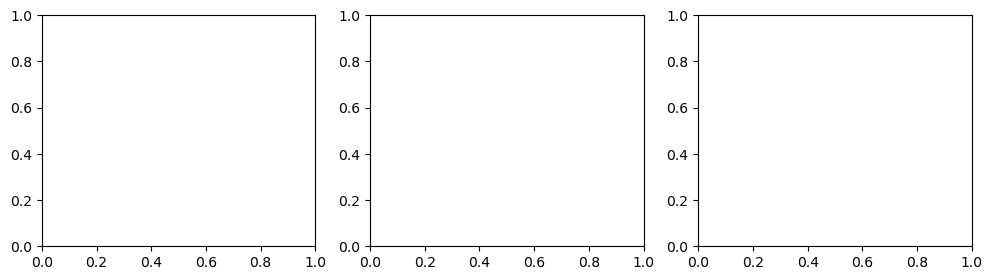

In [47]:
fig, axes = plt.subplots(1, 3, figsize = (12,3))
i_0 = df_1.groupby('h1n1_concern').value_counts().index
axes[0]

In [48]:
df['h1n1_vaccine'].value_counts(normalize = True)

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [49]:
df['seasonal_vaccine'].value_counts(normalize = True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

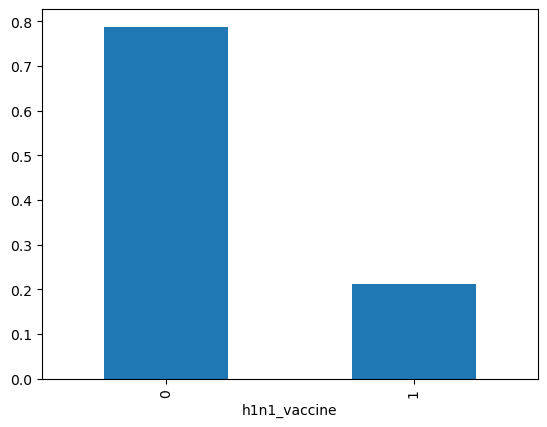

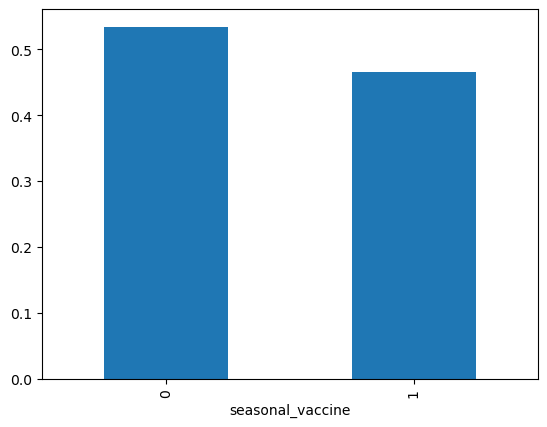

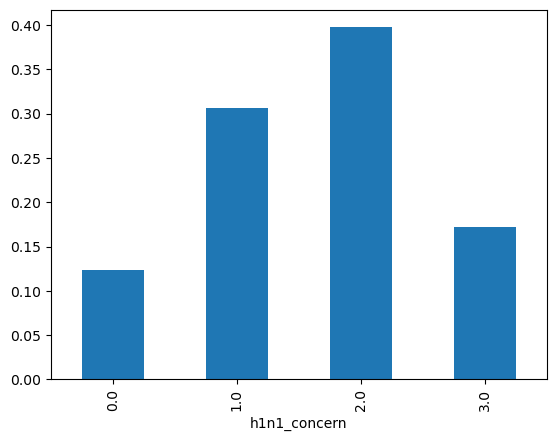

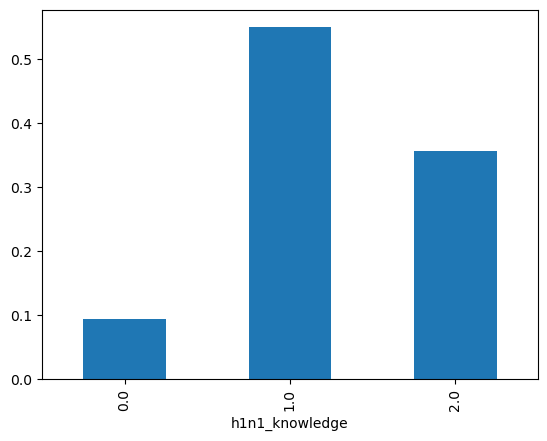

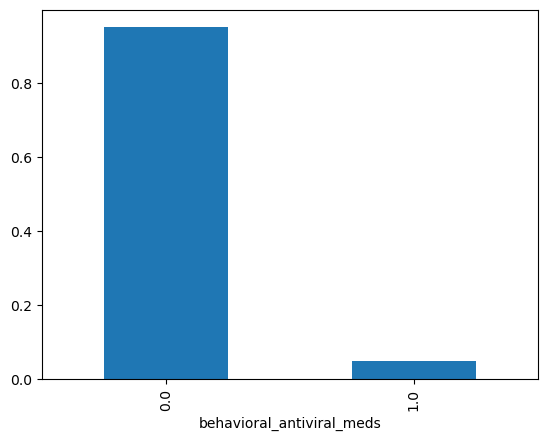

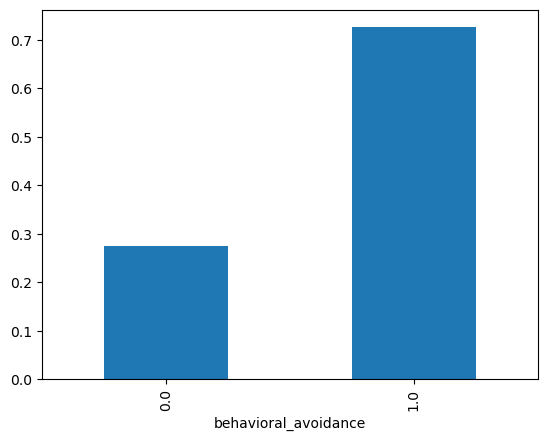

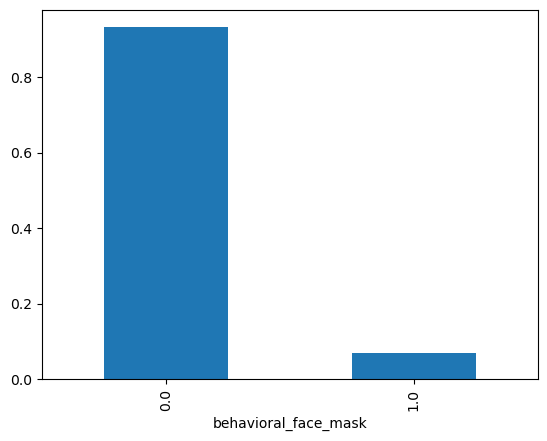

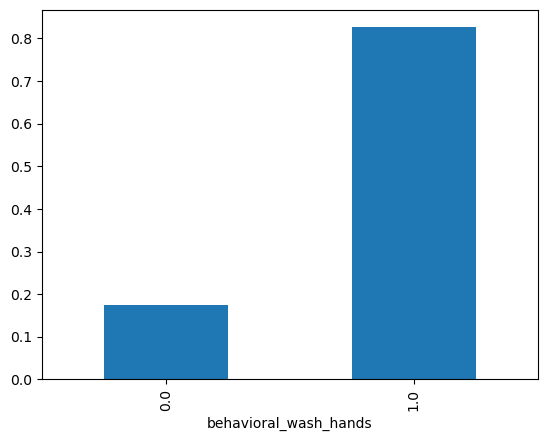

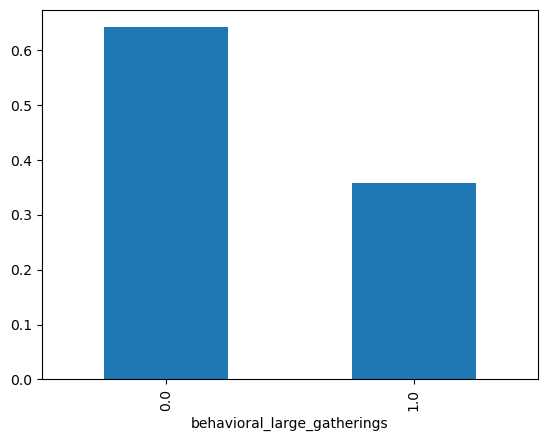

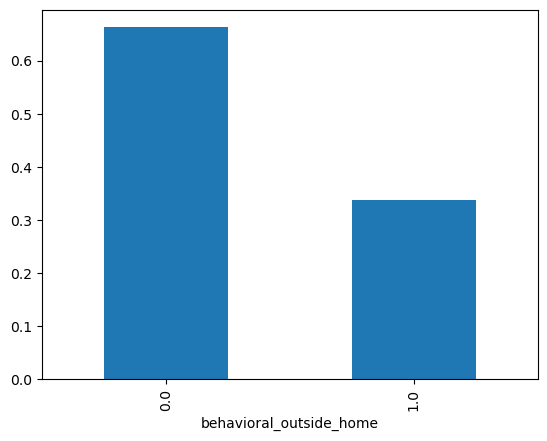

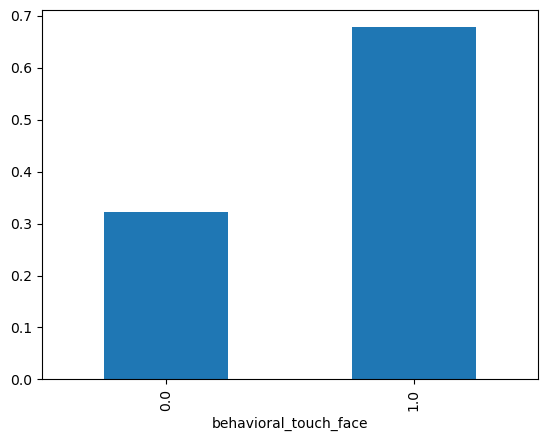

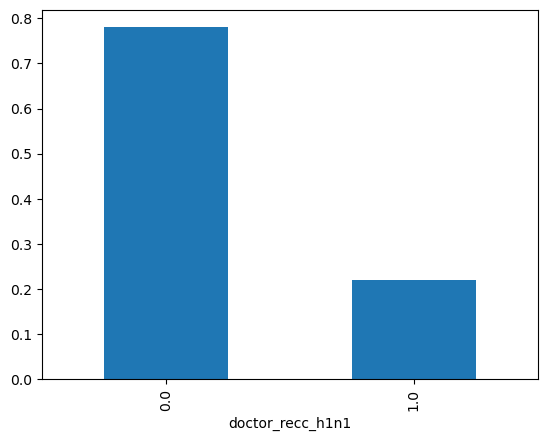

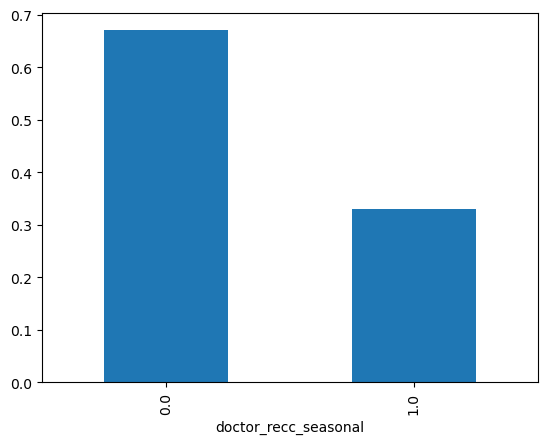

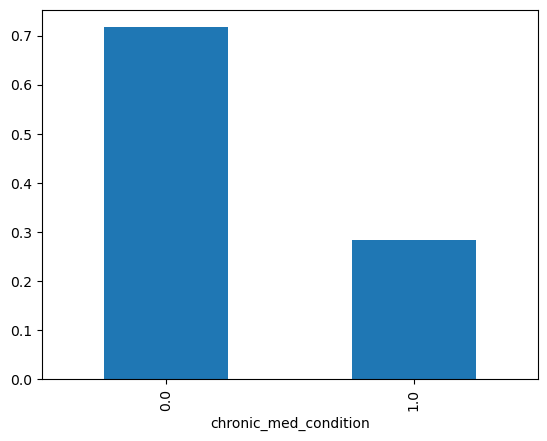

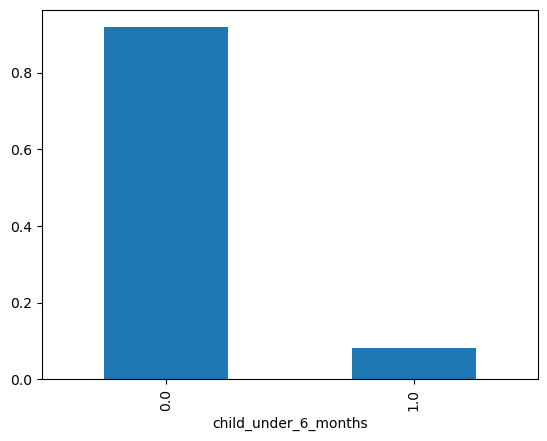

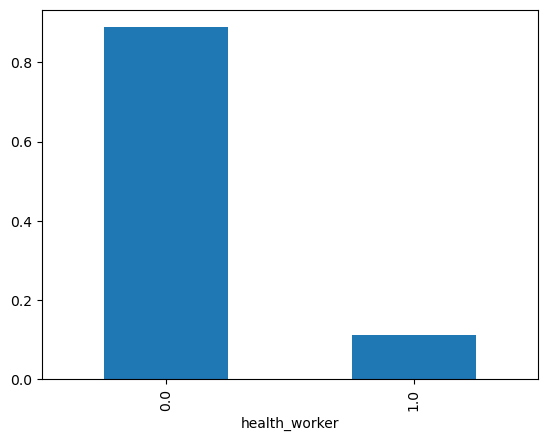

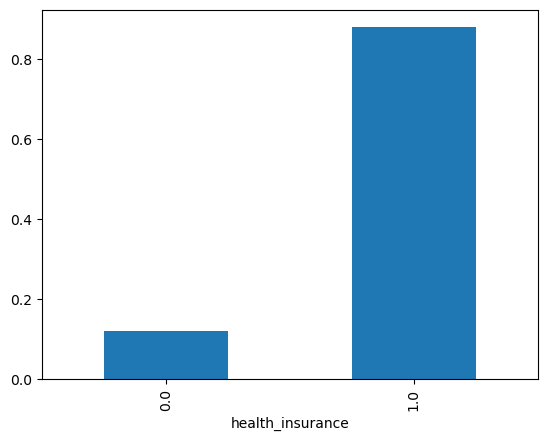

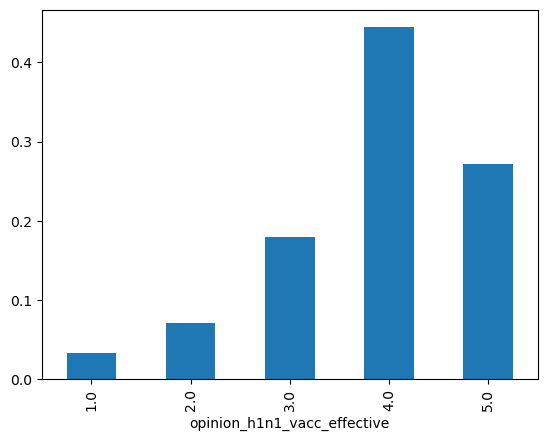

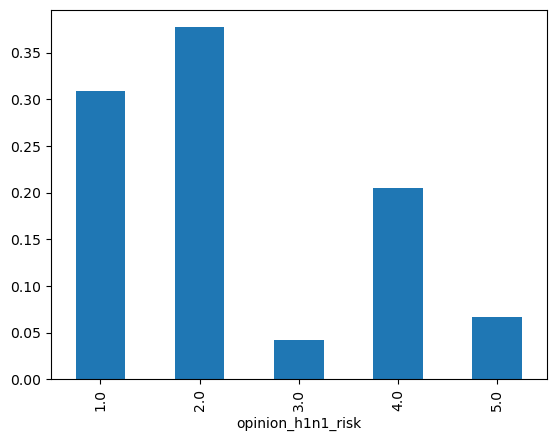

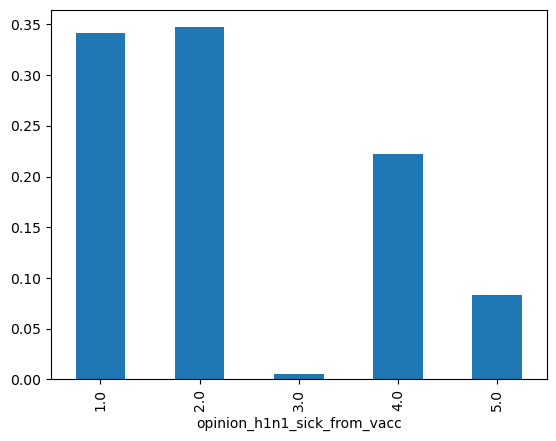

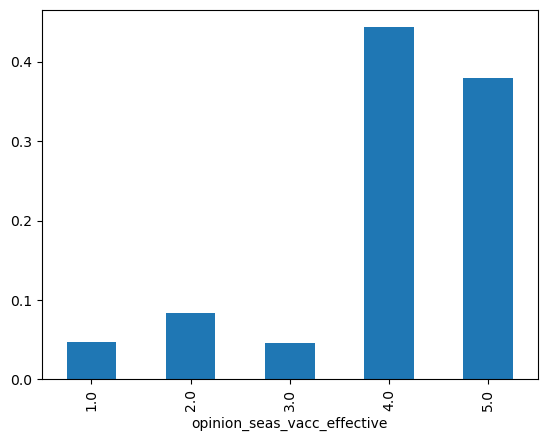

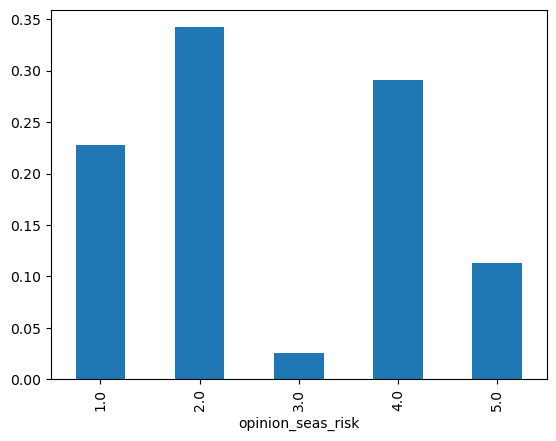

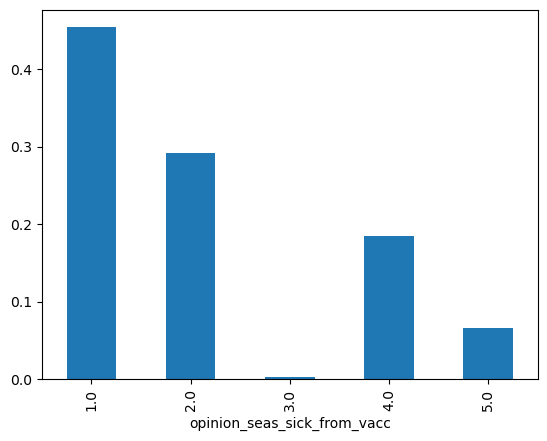

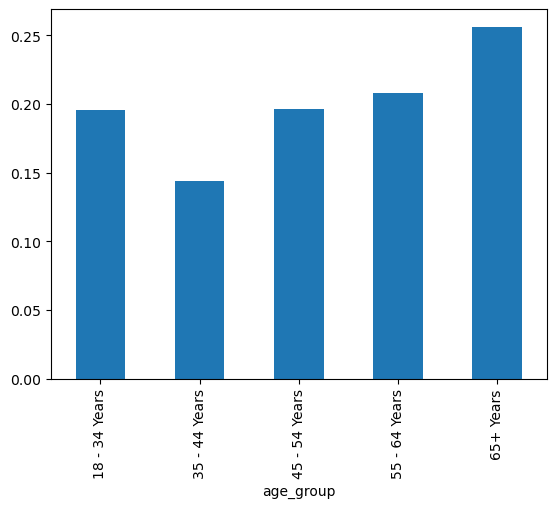

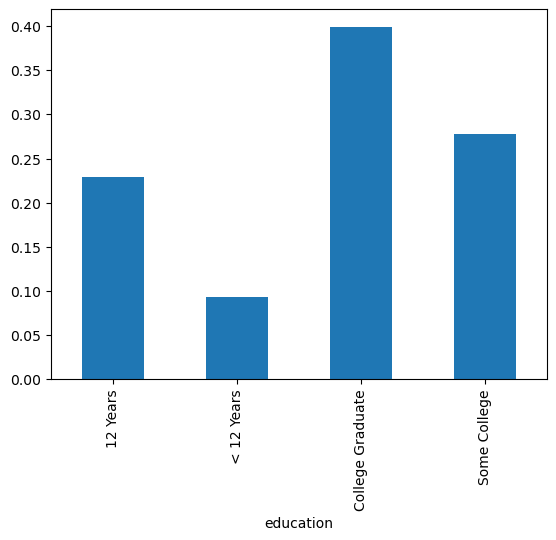

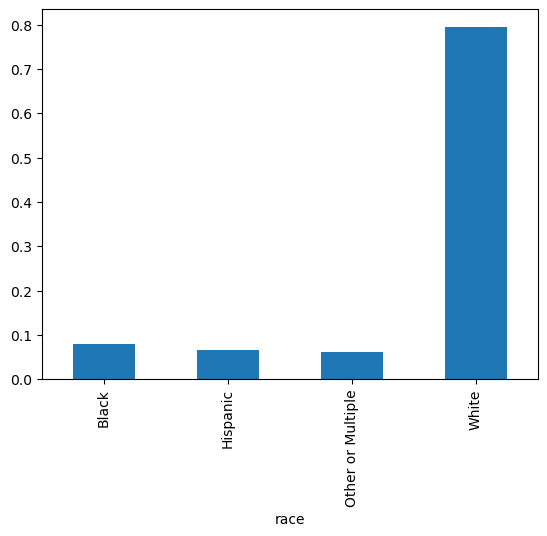

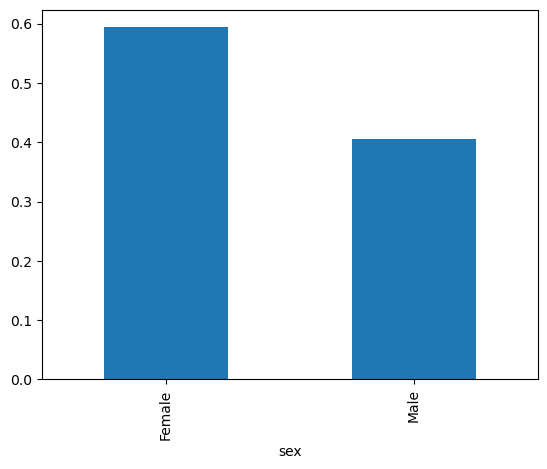

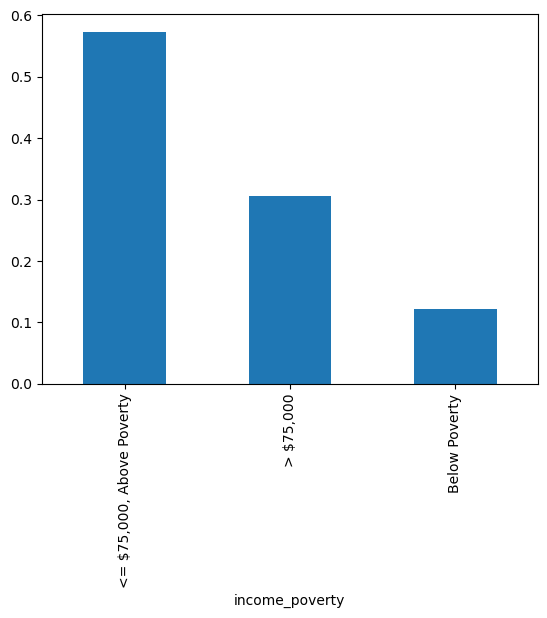

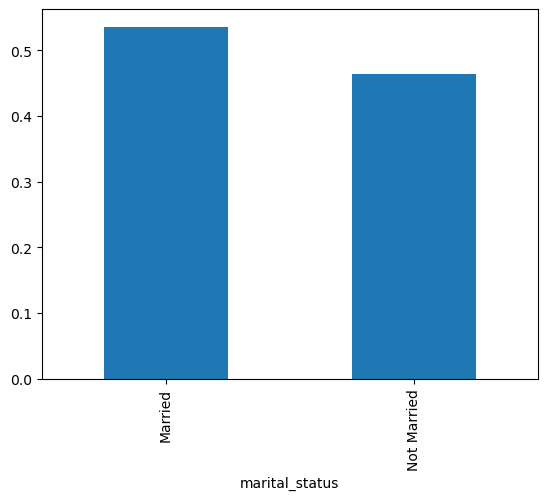

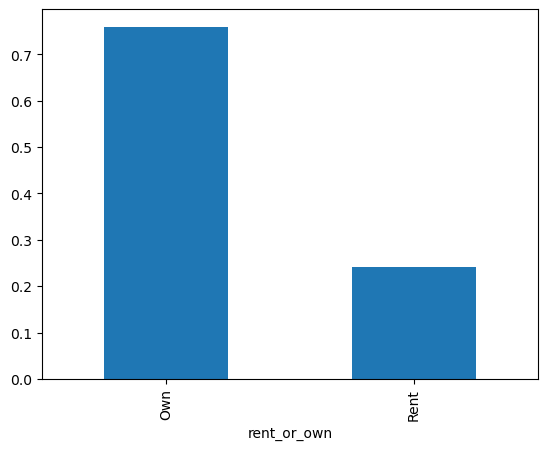

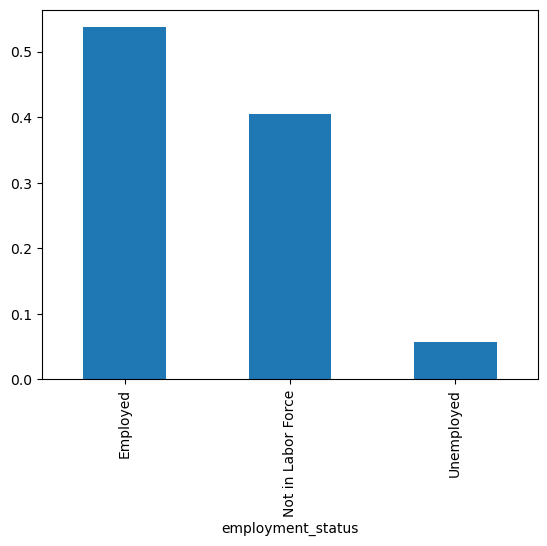

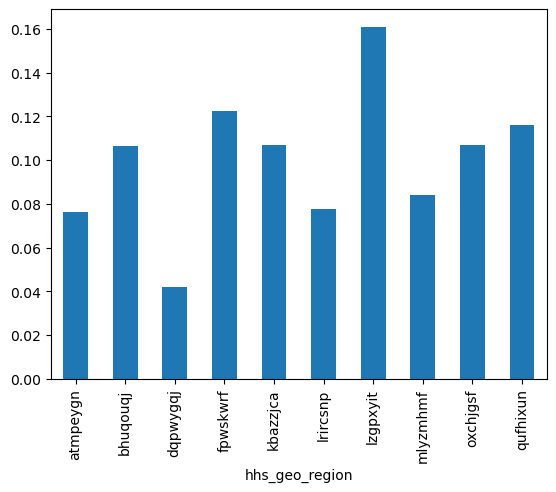

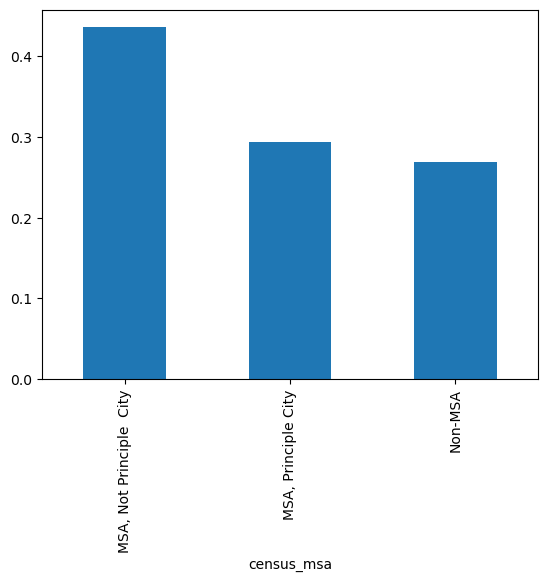

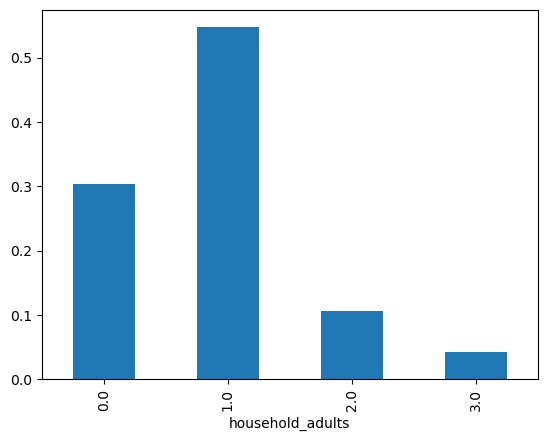

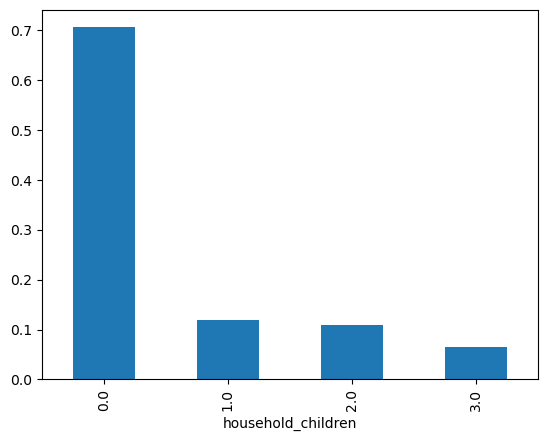

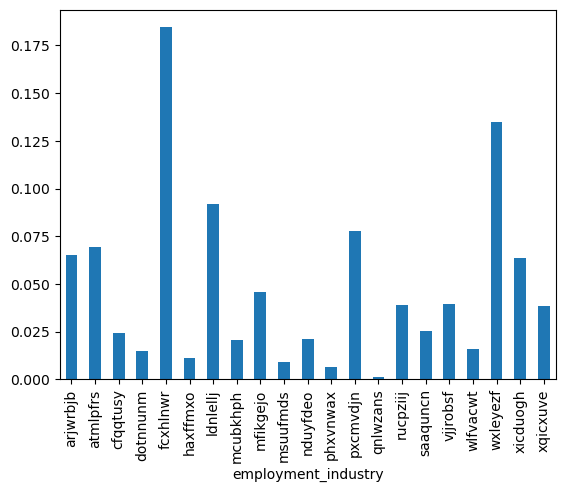

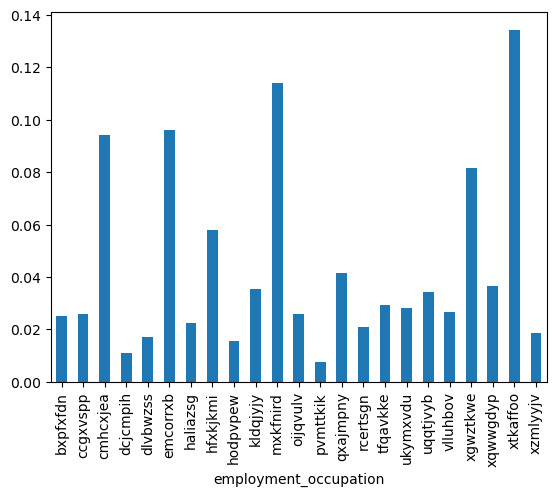

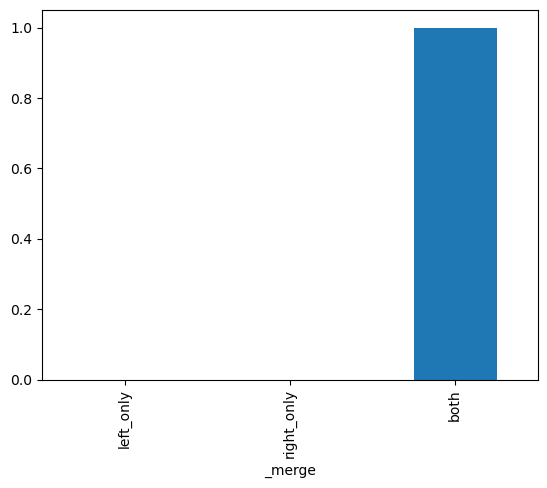

In [50]:
for i in df.columns :
    df[i].value_counts(normalize = True).sort_index().plot(kind='bar')
    plt.show()
    

## Overal percentage of H1N1 vaccination of all the columns

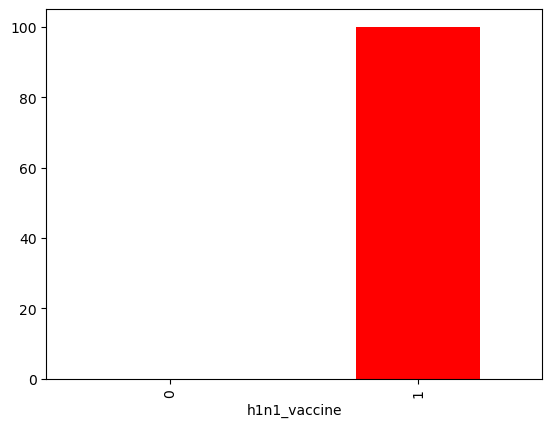

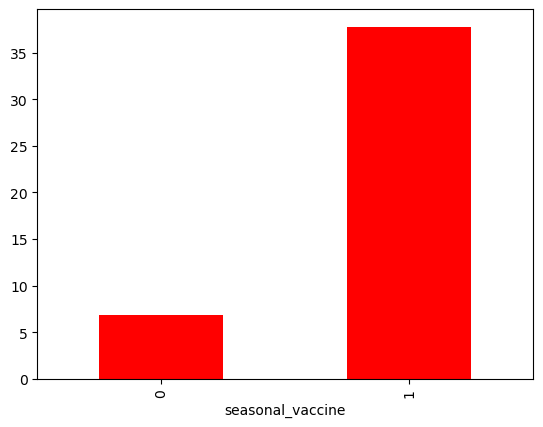

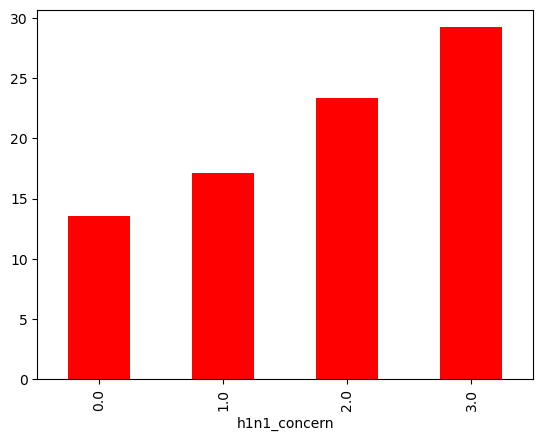

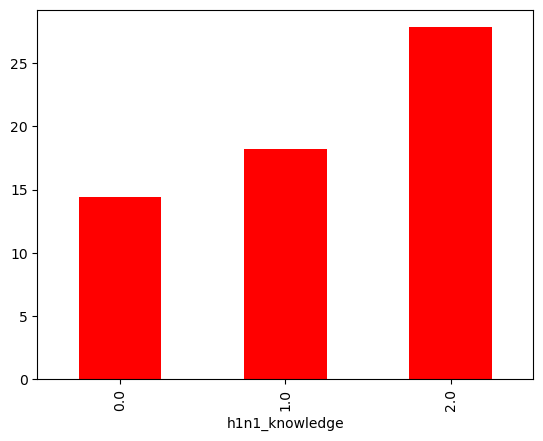

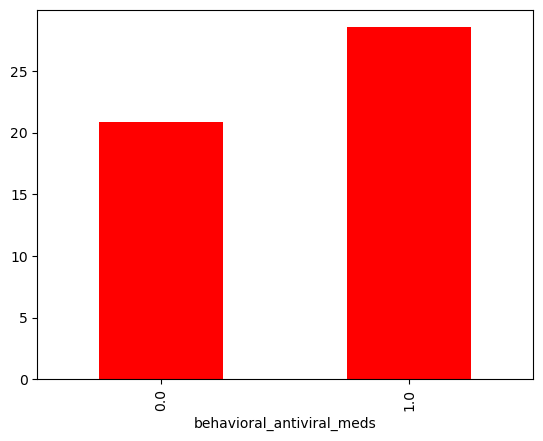

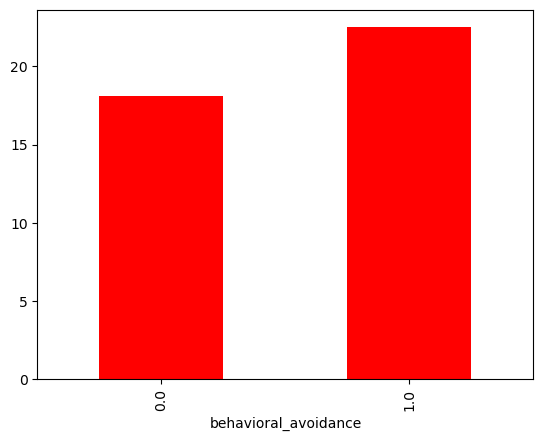

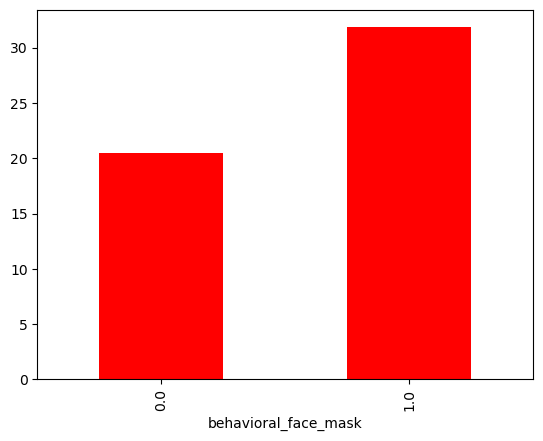

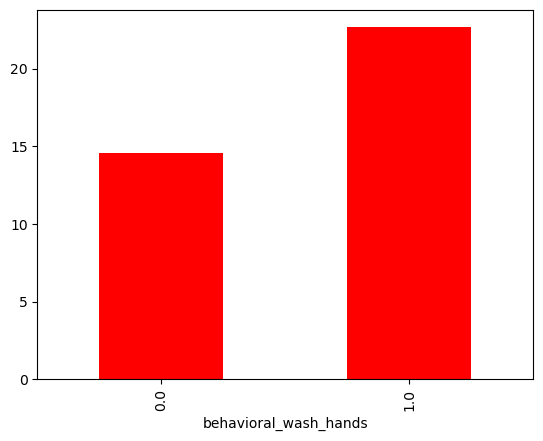

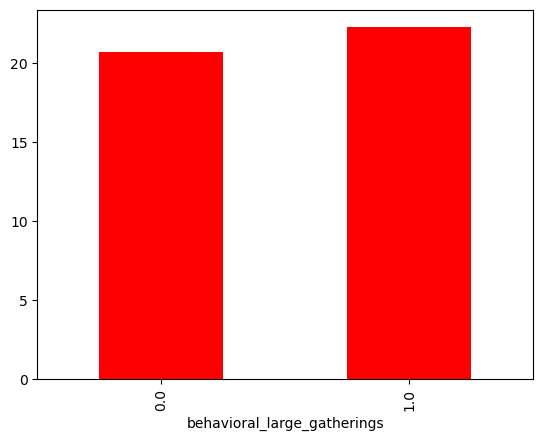

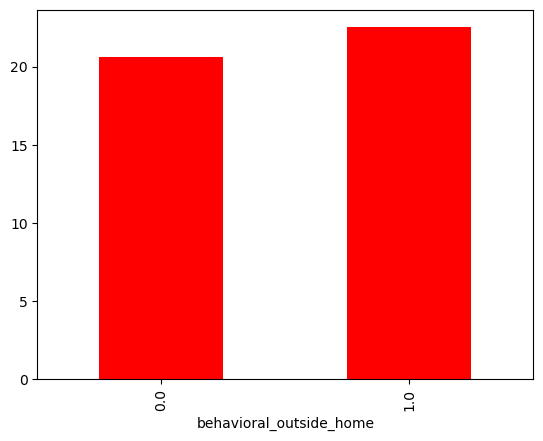

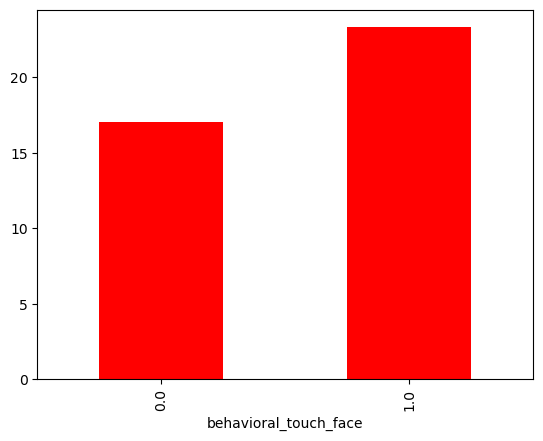

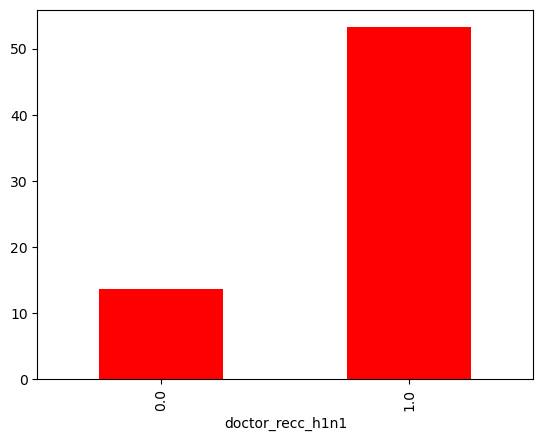

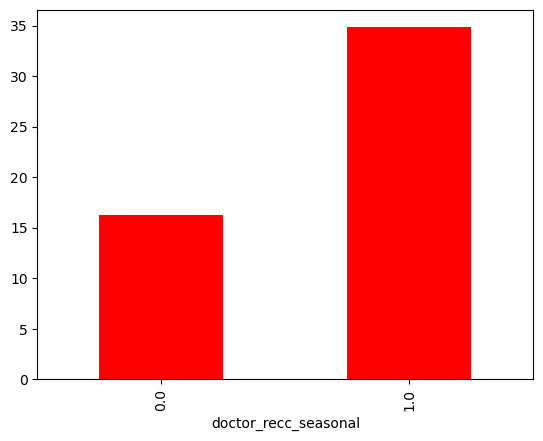

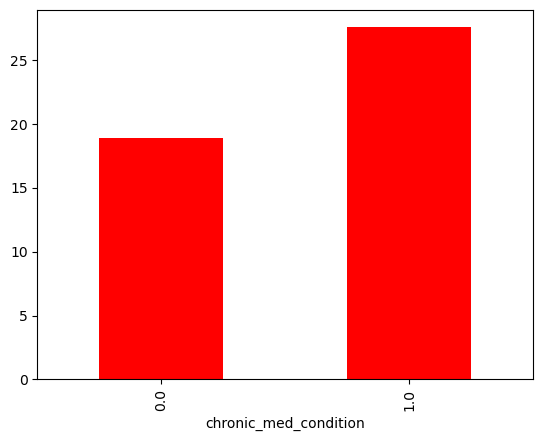

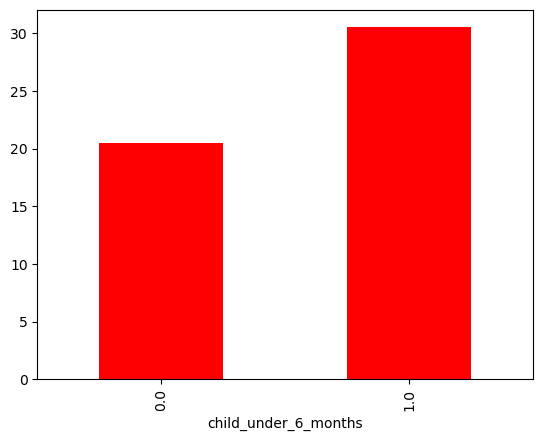

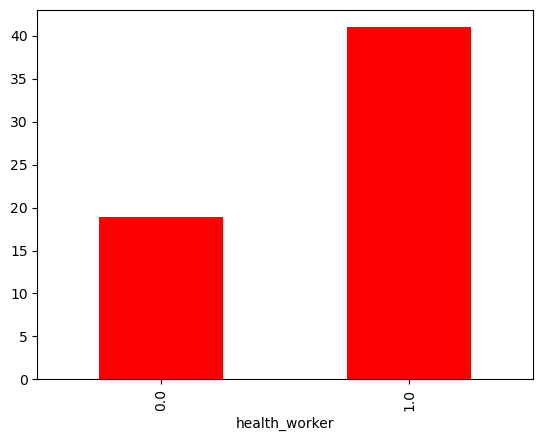

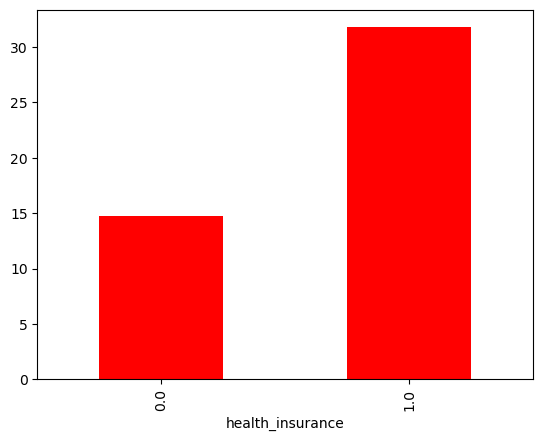

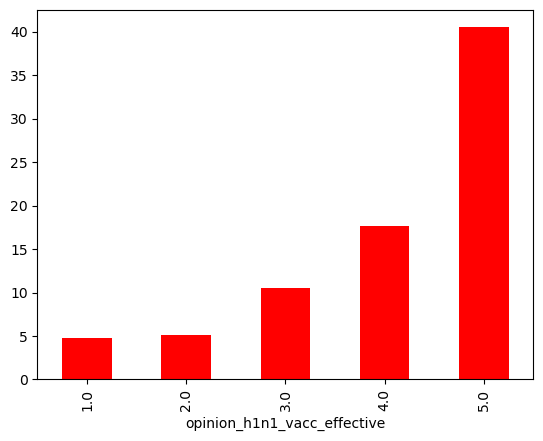

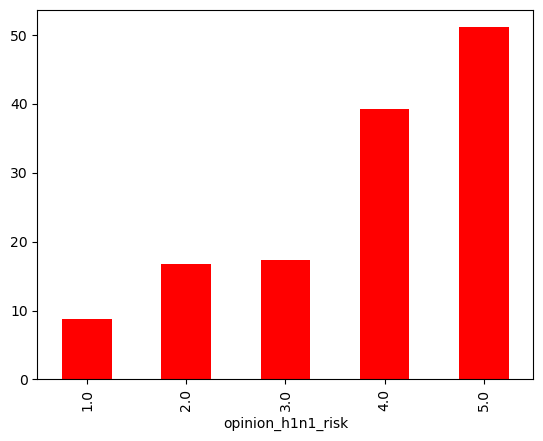

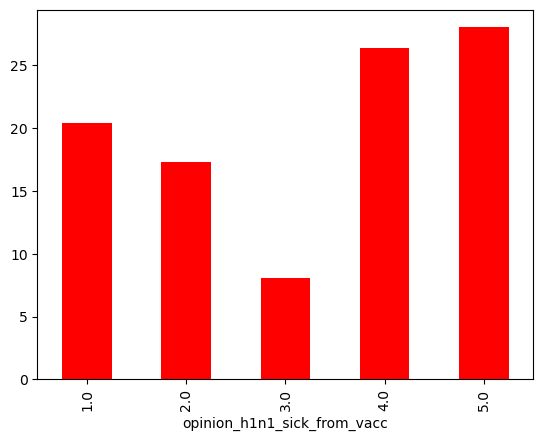

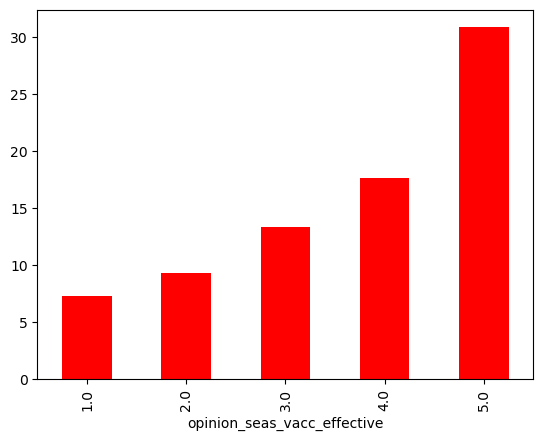

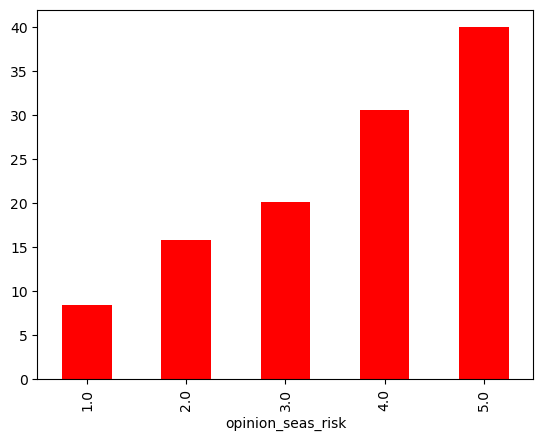

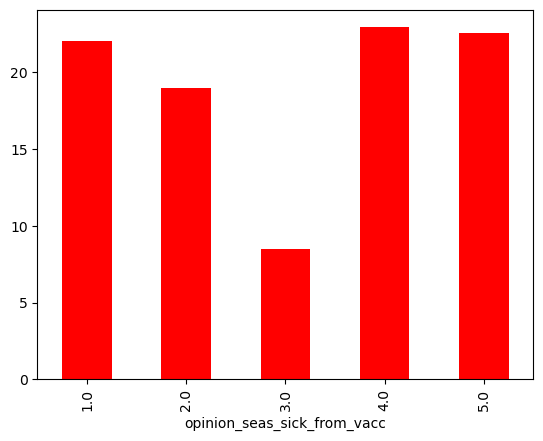

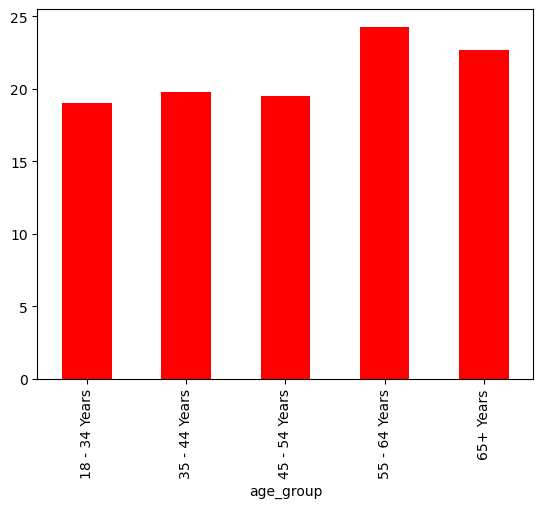

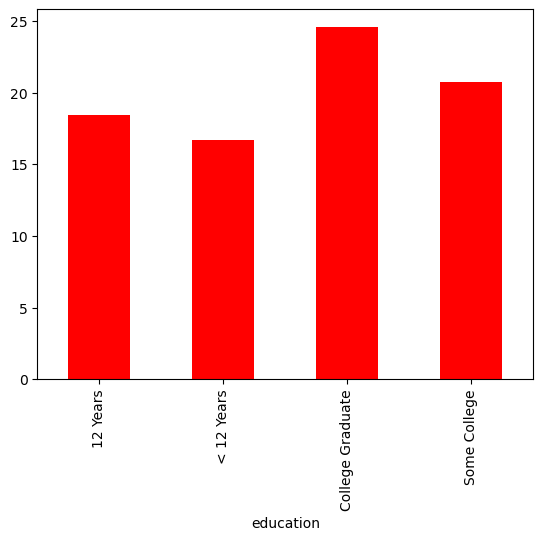

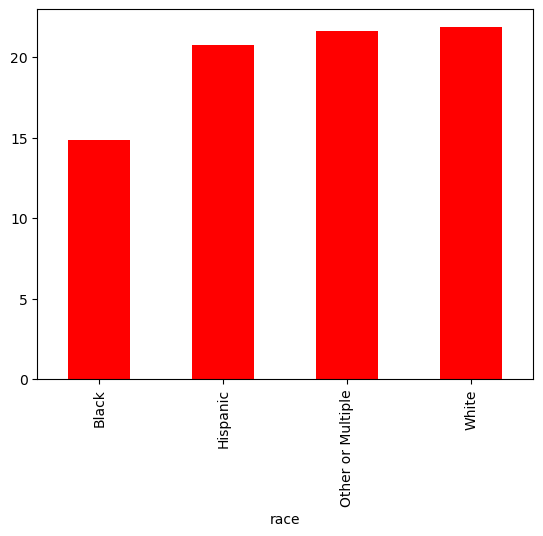

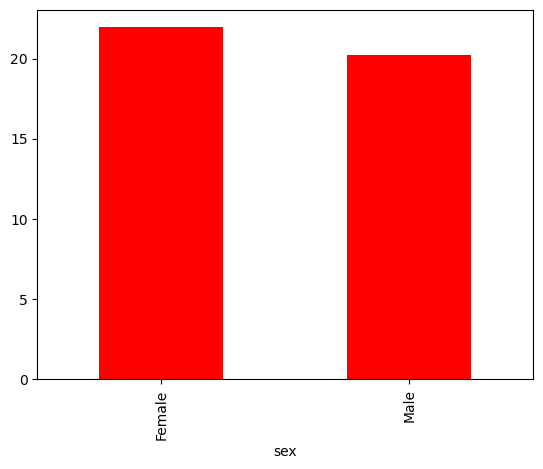

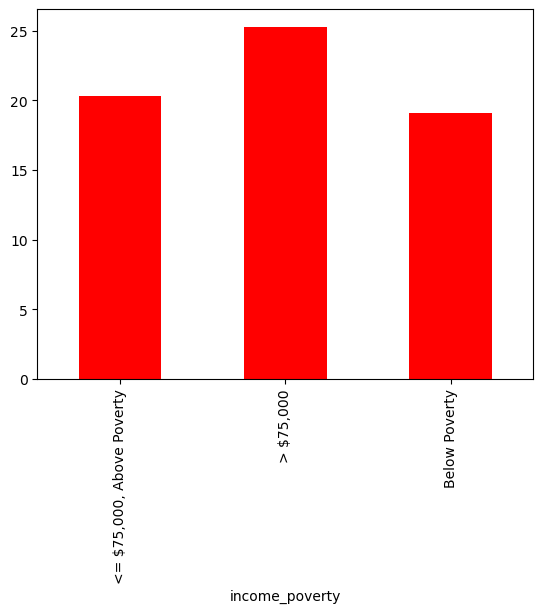

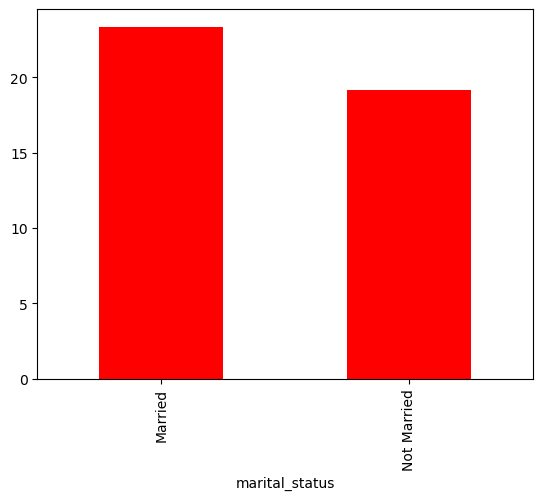

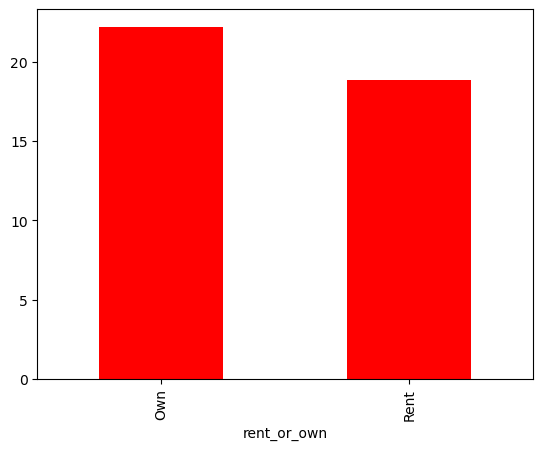

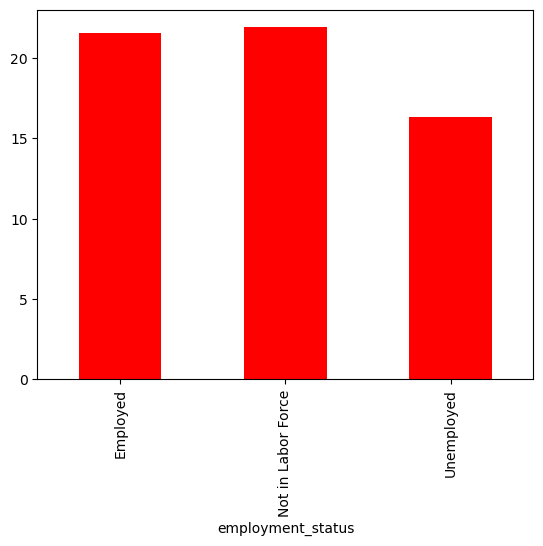

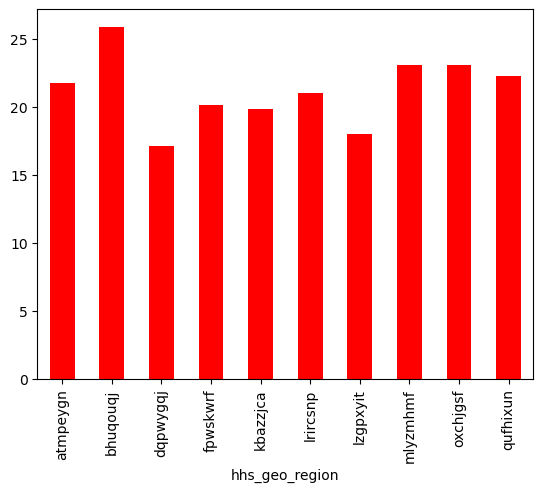

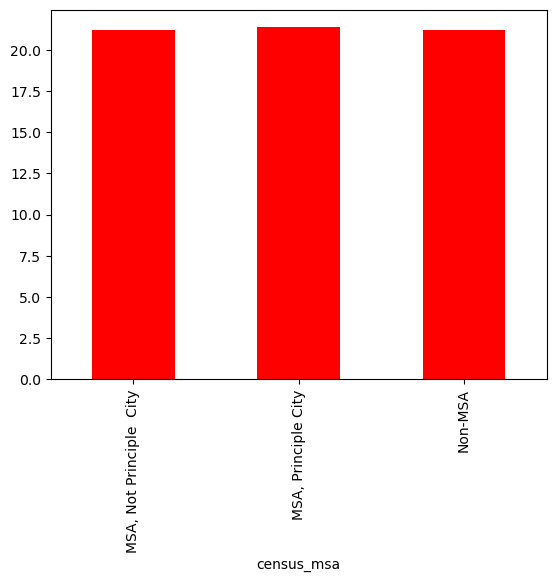

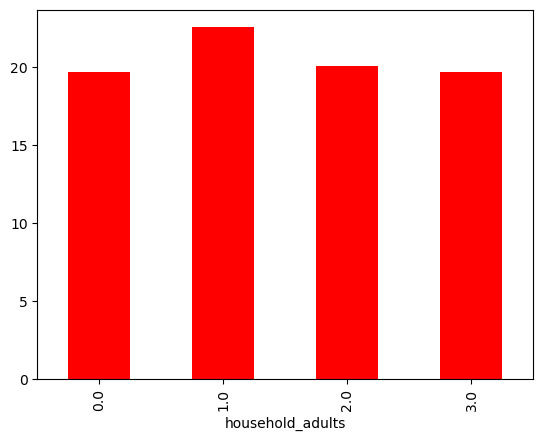

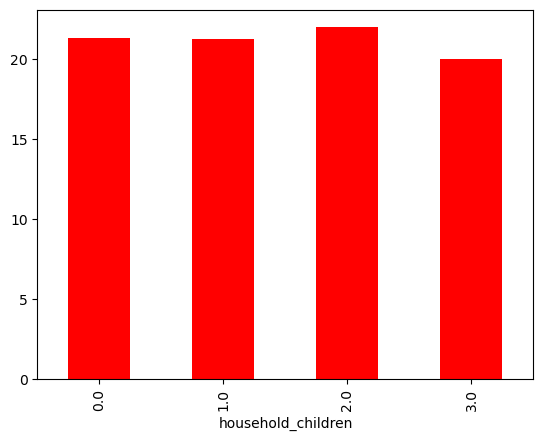

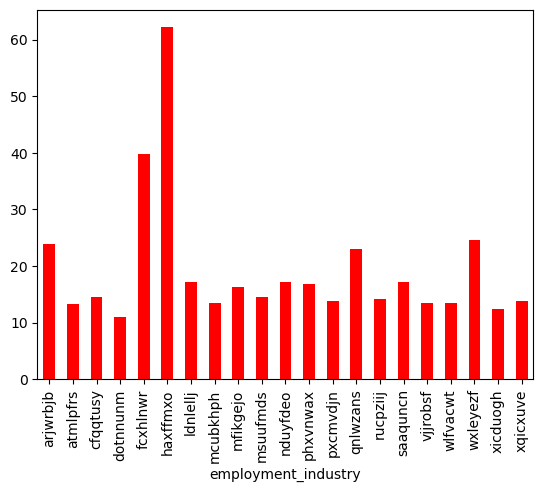

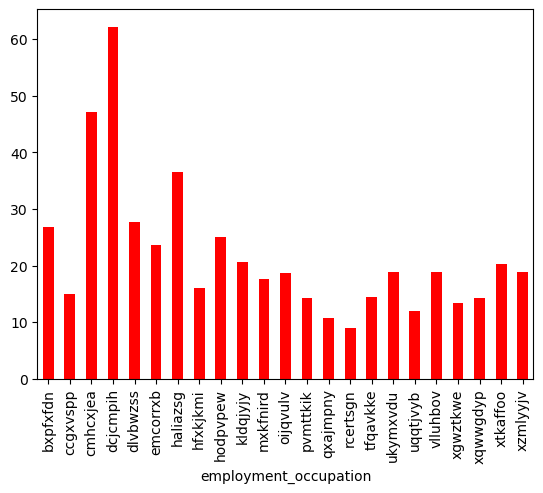

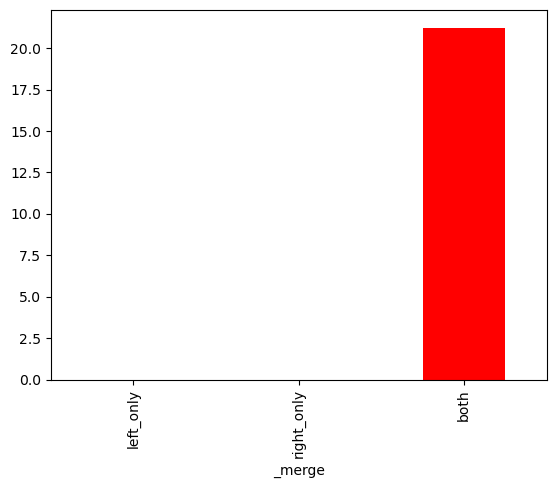

In [51]:
for i in df.columns :
    hn = df.groupby(i)['h1n1_vaccine'].sum().sort_index()
    ct = df[i].value_counts().sort_index()
    hn = pd.DataFrame(hn)
    ct = pd.DataFrame(ct)
    hn_ct = hn.merge(ct,left_index = True, right_index = True)
    hn_ct['percentage'] = hn_ct['h1n1_vaccine'] / hn_ct['count'] * 100
    hn_ct['percentage'].plot(kind = 'bar', color = 'r')
    plt.show()
    

## Overal percentage of seasonal vaccination of all the columns

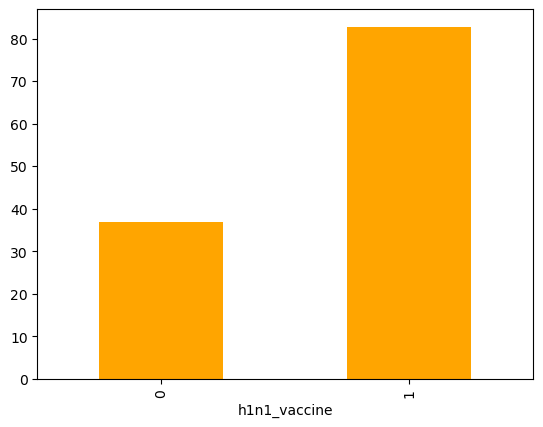

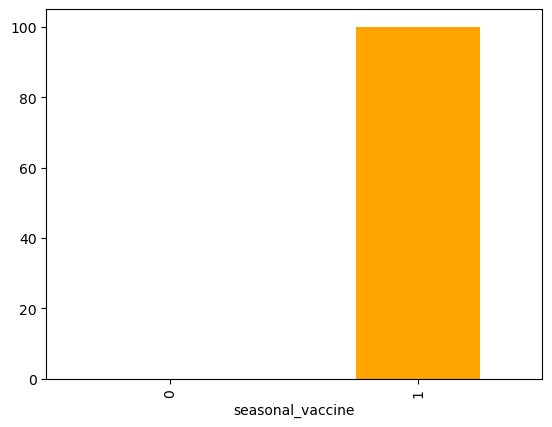

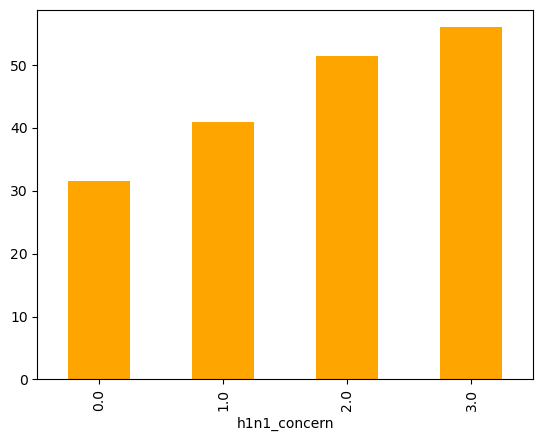

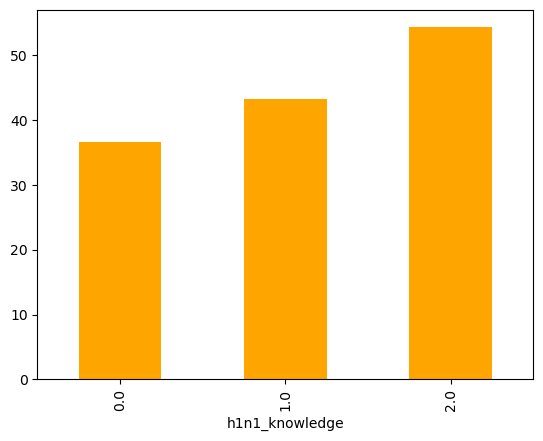

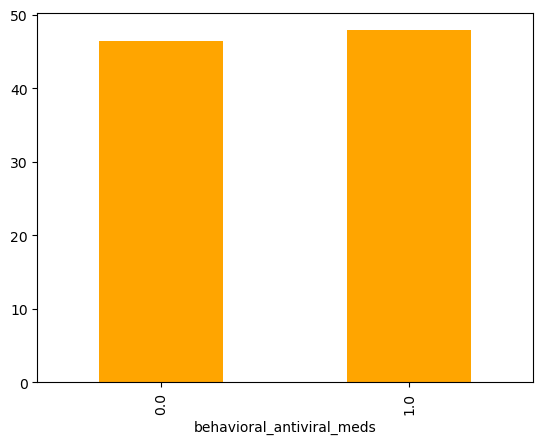

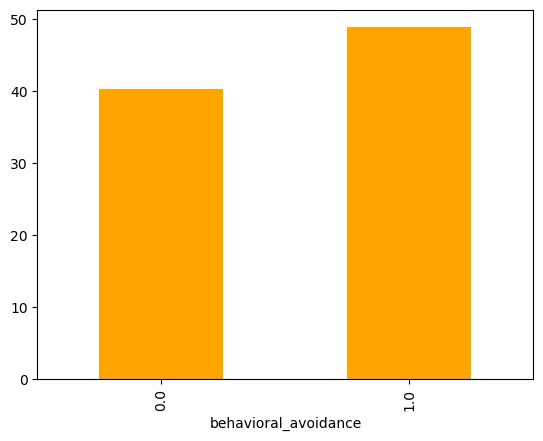

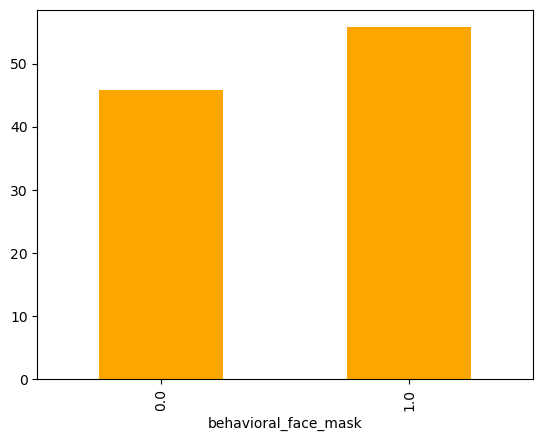

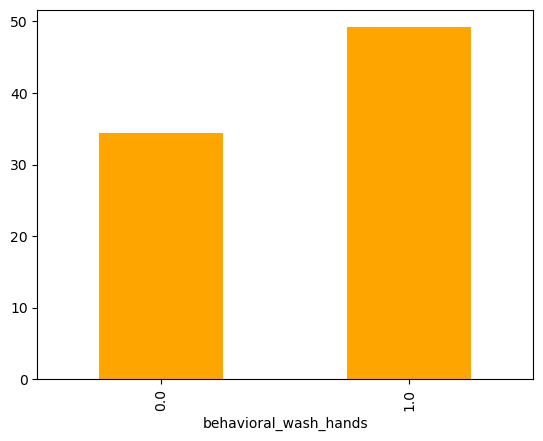

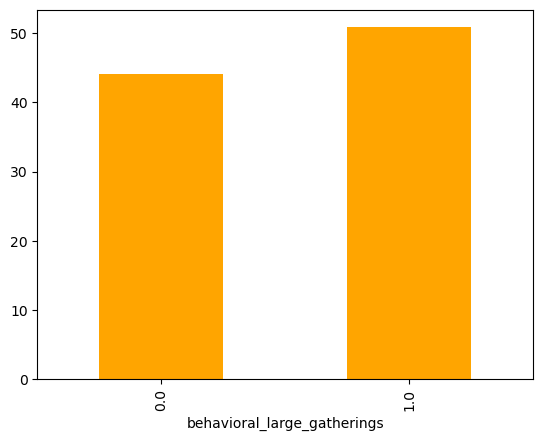

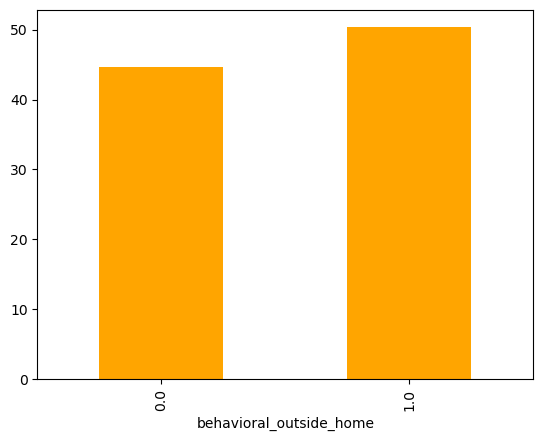

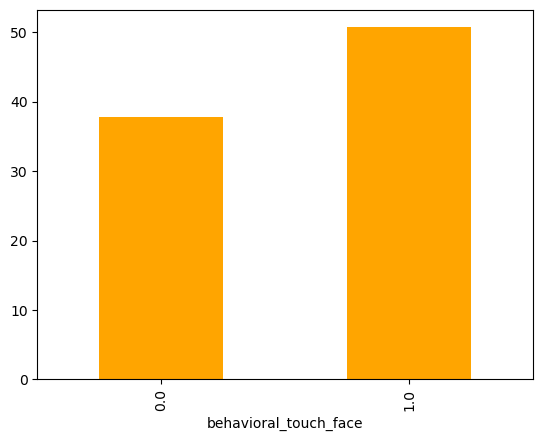

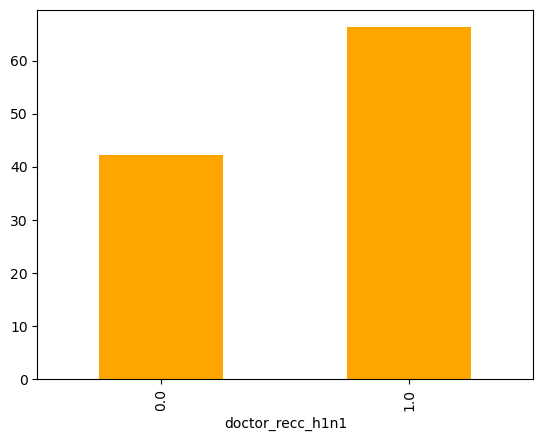

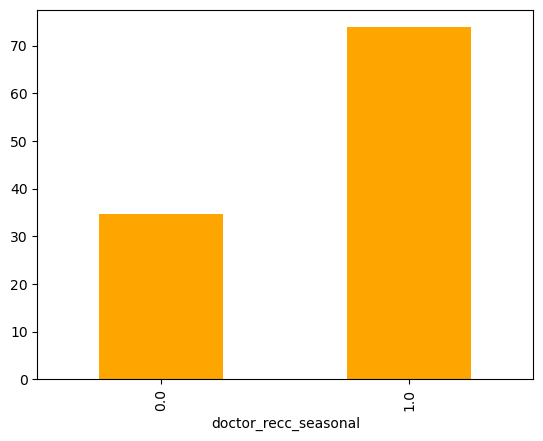

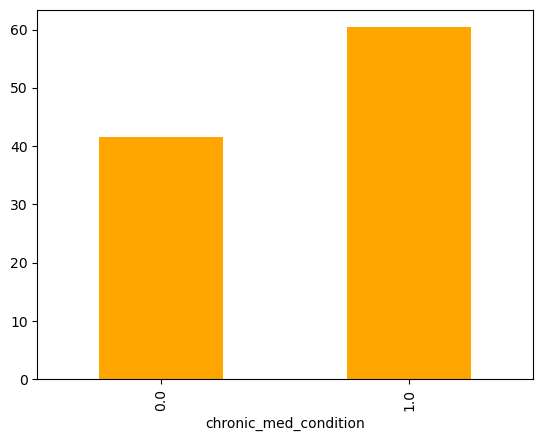

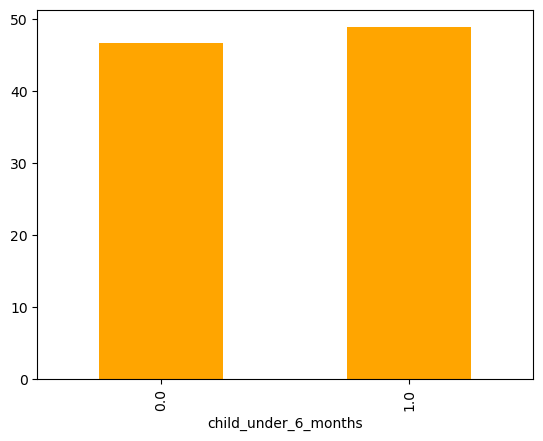

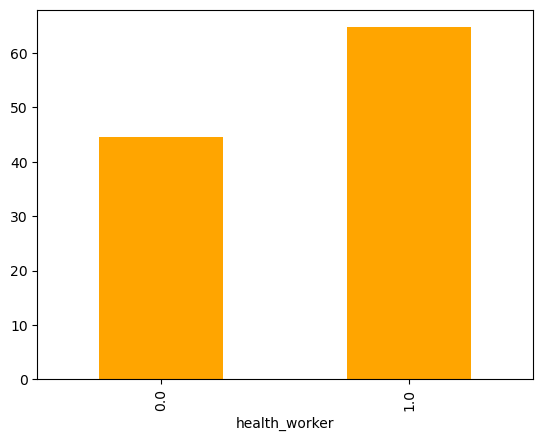

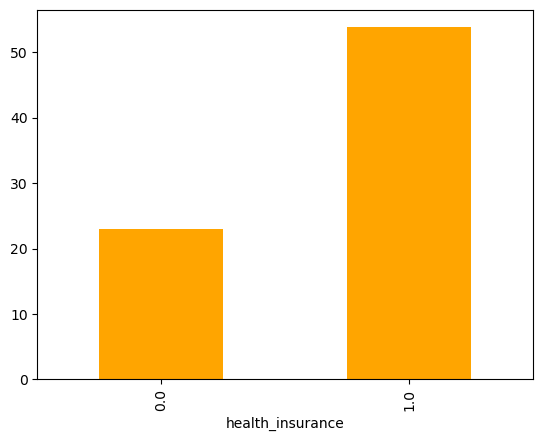

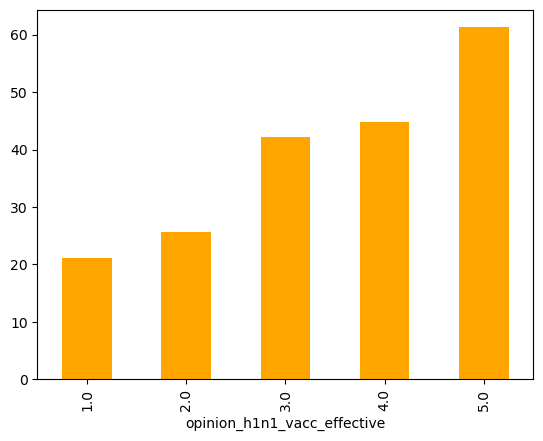

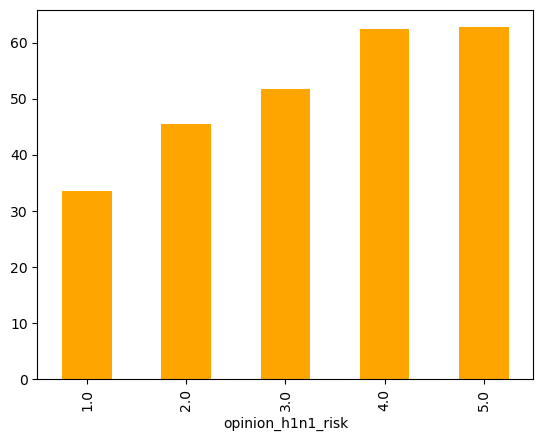

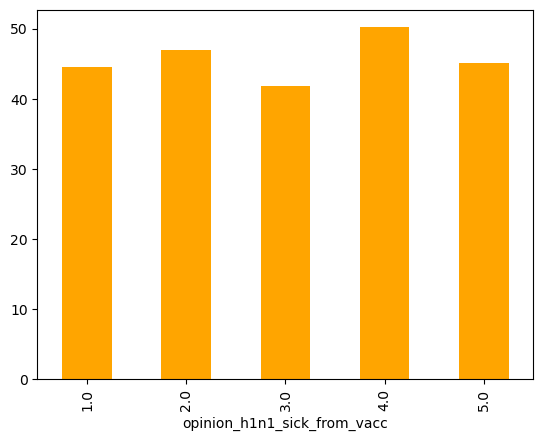

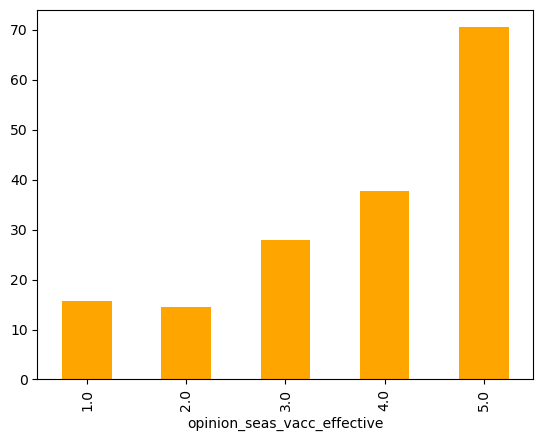

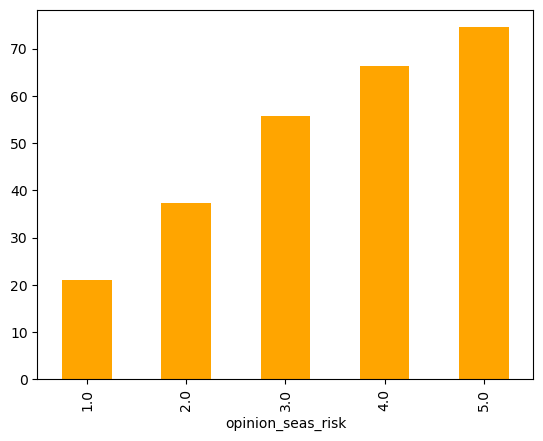

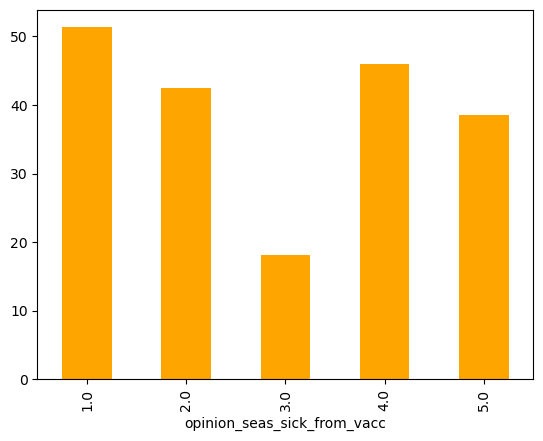

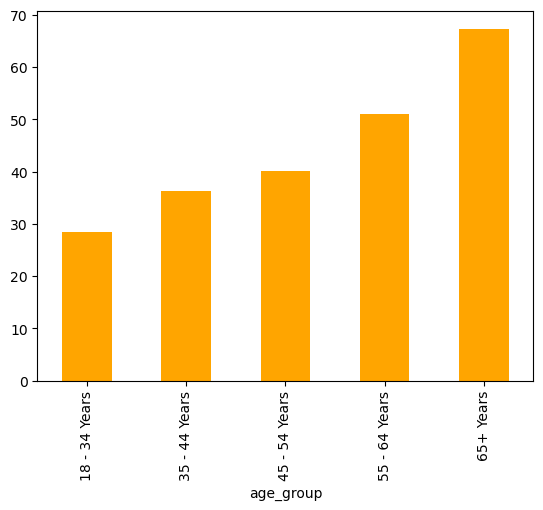

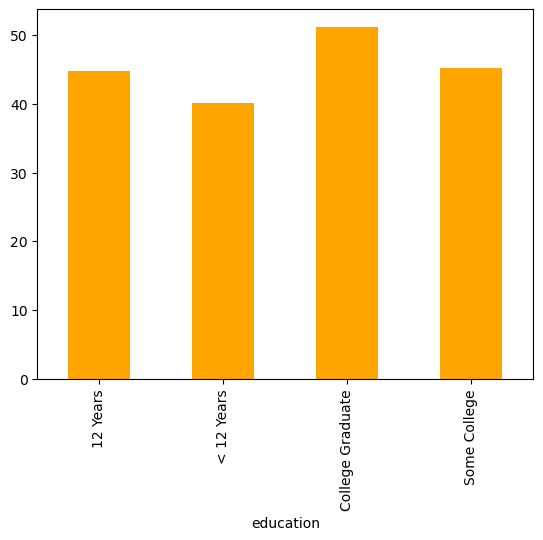

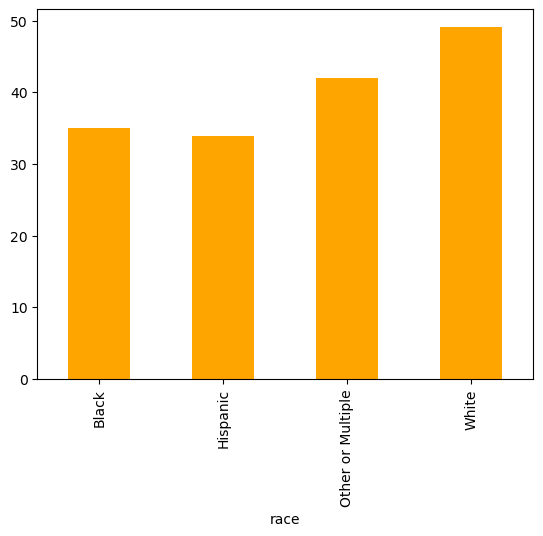

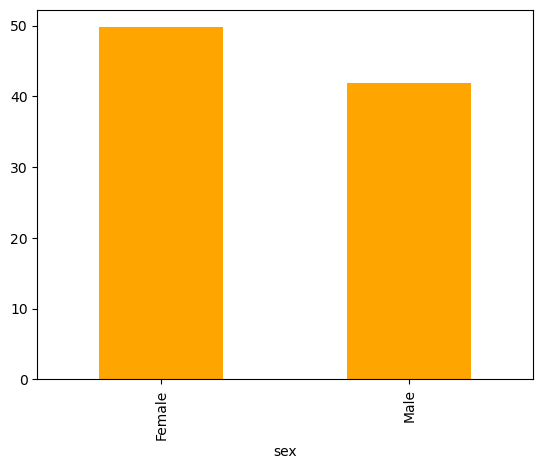

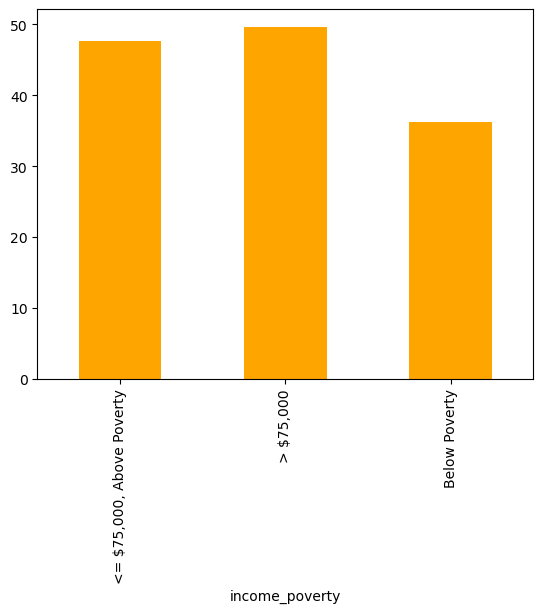

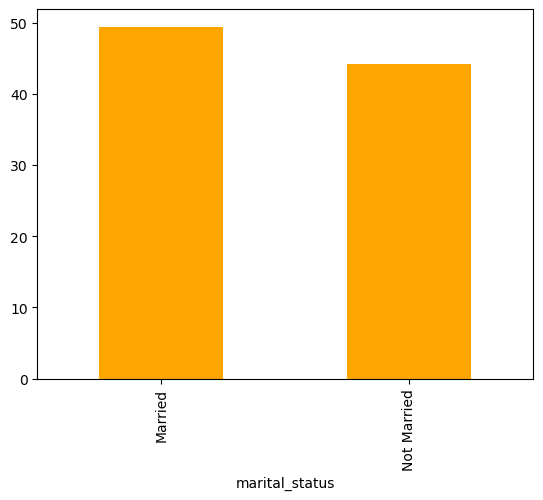

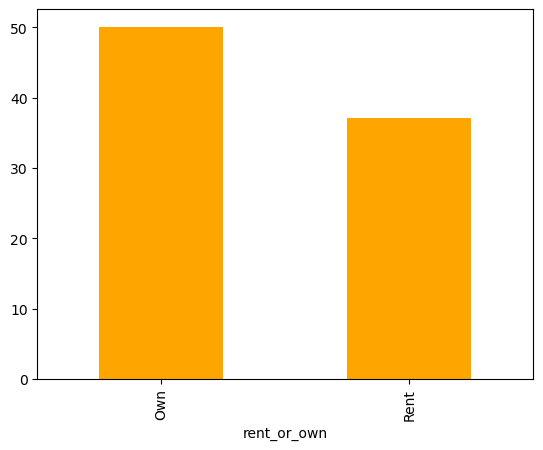

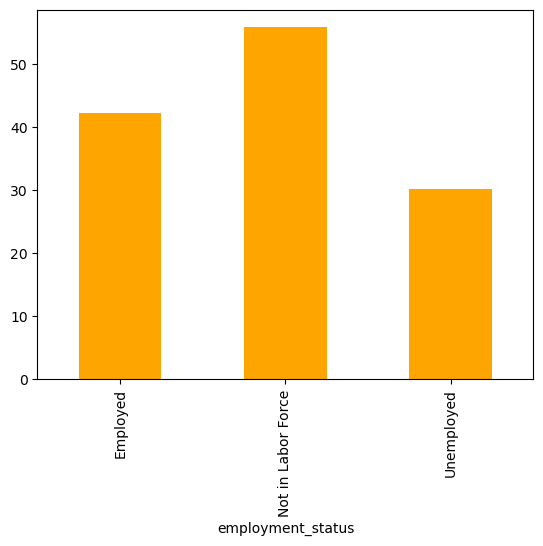

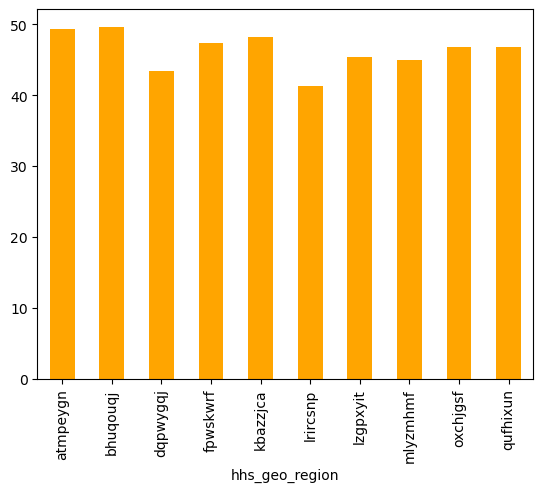

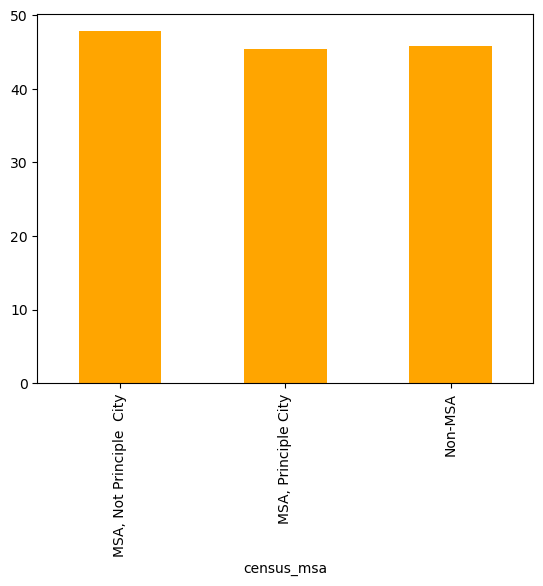

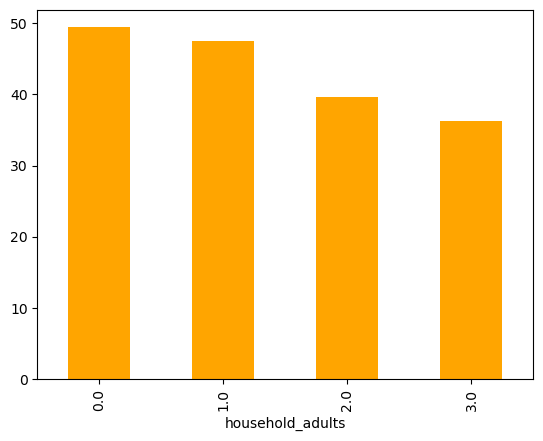

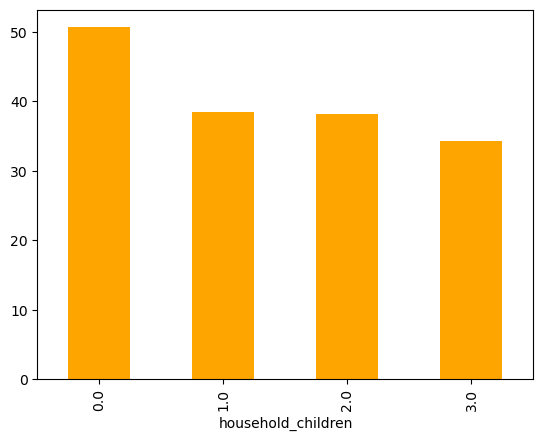

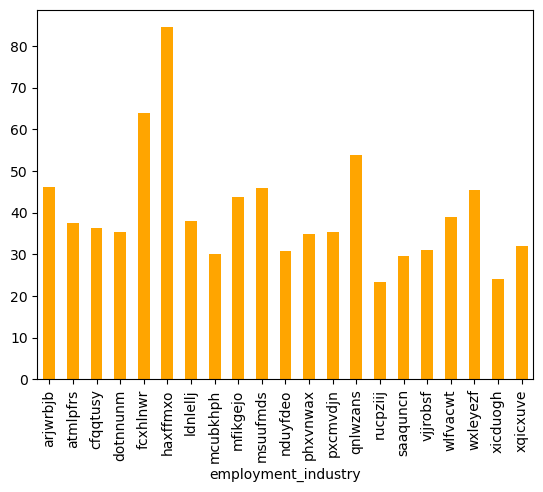

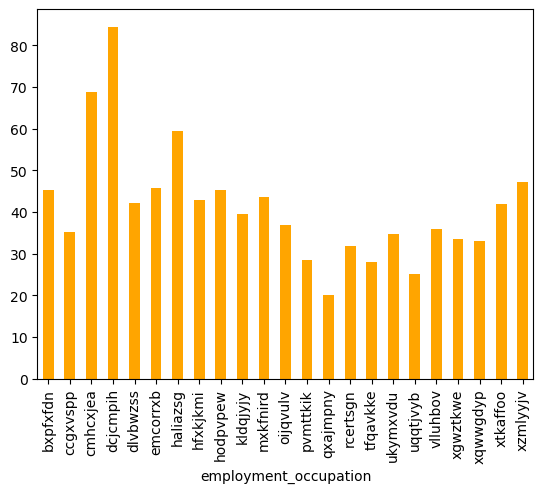

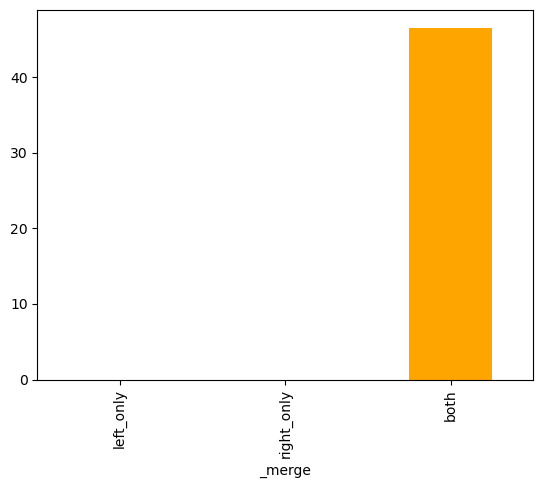

In [55]:
for i in df.columns :
    hn = df.groupby(i)['seasonal_vaccine'].sum().sort_index()
    ct = df[i].value_counts().sort_index()
    hn = pd.DataFrame(hn)
    ct = pd.DataFrame(ct)
    hn_ct = hn.merge(ct,left_index = True, right_index = True)
    hn_ct['percentage'] = hn_ct['seasonal_vaccine'] / hn_ct['count'] * 100
    hn_ct['percentage'].plot(kind = 'bar', color = 'orange')
    plt.show()
    

## Extra Analysis

There is no significant effects on vaccination by regions

In [56]:
# There are no missing values in columns below
df[['hhs_geo_region','seasonal_vaccine', 'h1n1_vaccine']].isna().sum()

hhs_geo_region      0
seasonal_vaccine    0
h1n1_vaccine        0
dtype: int64

### Seansonal vaccination

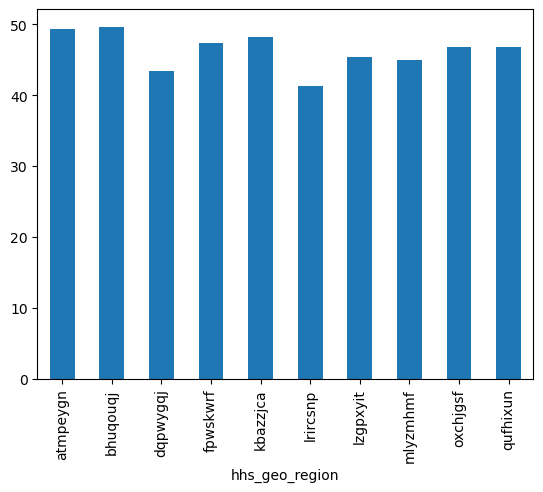

In [57]:
# How many seasonal vaccinations by regions
rg_sv = df.groupby('hhs_geo_region')['seasonal_vaccine'].sum().sort_index()

# How many respondent by regions
rg_ct = df['hhs_geo_region'].value_counts().sort_index()

# Transform to DataFrame and merge
rg_sv = pd.DataFrame(rg_sv)
rg_ct = pd.DataFrame(rg_ct)
rg_sv_ct = rg_sv.merge(rg_ct, on = 'hhs_geo_region')

# Calculation of percentage of seasonal vaccination
rg_sv_ct['percentage'] = rg_sv_ct['seasonal_vaccine'] / rg_sv_ct['count'] * 100

rg_sv_ct['percentage'].plot(kind = 'bar')

plt.show()

### H1N1 vaccination

### Gender

In [58]:
df['employment_status'].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [59]:
df['employment_industry'].info()

<class 'pandas.core.series.Series'>
Index: 26707 entries, 0 to 26706
Series name: employment_industry
Non-Null Count  Dtype 
--------------  ----- 
13377 non-null  object
dtypes: object(1)
memory usage: 417.3+ KB


In [60]:
df['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

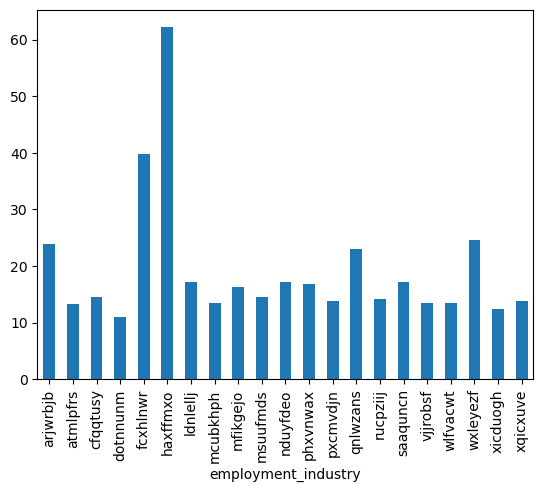

In [61]:
# How many H1N1 vaccinations by regions
hn = df.groupby('employment_industry')['h1n1_vaccine'].sum().sort_index()

# How many respondent by regions
ct = df['employment_industry'].value_counts().sort_index()

# Transform to DataFrame and merge
hn = pd.DataFrame(hn)
ct = pd.DataFrame(ct)
hn_ct = hn.merge(ct, on = 'employment_industry')

# Calculation of percentage of seasonal vaccination
hn_ct['percentage'] = hn_ct['h1n1_vaccine'] / hn_ct['count'] * 100

hn_ct['percentage'].plot(kind = 'bar')

plt.show()

In [62]:
ei_hn = df.groupby('employment_industry')['h1n1_vaccine'].sum().sort_index()
ei_hn

employment_industry
arjwrbjb    208
atmlpfrs    124
cfqqtusy     47
dotnnunm     22
fcxhlnwr    982
haxffmxo     92
ldnlellj    212
mcubkhph     37
mfikgejo    100
msuufmds     18
nduyfdeo     49
phxvnwax     15
pxcmvdjn    143
qnlwzans      3
rucpziij     74
saaquncn     58
vjjrobsf     71
wlfvacwt     29
wxleyezf    443
xicduogh    105
xqicxuve     71
Name: h1n1_vaccine, dtype: int64

In [63]:
ei_ct = df['employment_industry'].value_counts().sort_index()
ei_ct

employment_industry
arjwrbjb     871
atmlpfrs     926
cfqqtusy     325
dotnnunm     201
fcxhlnwr    2468
haxffmxo     148
ldnlellj    1231
mcubkhph     275
mfikgejo     614
msuufmds     124
nduyfdeo     286
phxvnwax      89
pxcmvdjn    1037
qnlwzans      13
rucpziij     523
saaquncn     338
vjjrobsf     527
wlfvacwt     215
wxleyezf    1804
xicduogh     851
xqicxuve     511
Name: count, dtype: int64

In [64]:
ei_ct.sum()

13377

NameError: name 'i' is not defined

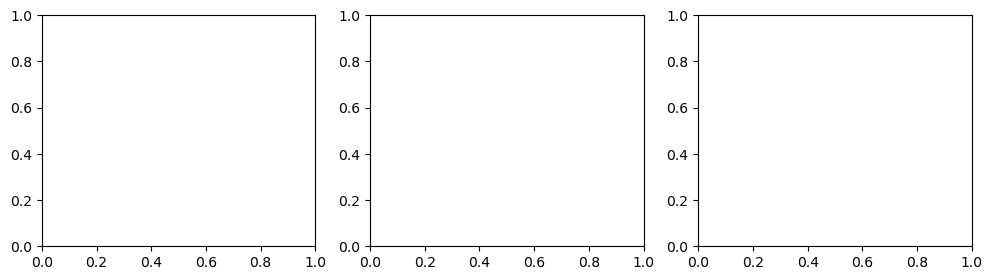

In [29]:
fig, axes = plt.subplots(ncols = 3, figsize = (12,3))
axes[0] = df[i].value_counts(normalize = True).sort_index().plot(kind='bar')
axes[1] = hn_ct['percentage'].plot(kind = 'bar', color = 'r')
axes[2] = hn_ct['percentage'].plot(kind = 'bar', color = 'orange')

plt.title('percentage')

plt.show()

# Machine Learning

In [45]:
# import packages
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns

## Grouping variables

In [8]:
behavioral = ['behavioral_antiviral_meds', 
              'behavioral_avoidance',
              'behavioral_face_mask', 
              'behavioral_wash_hands',
              'behavioral_large_gatherings', 
              'behavioral_outside_home',
              'behavioral_touch_face']

In [9]:
opinion = ['opinion_h1n1_vacc_effective', 
           'opinion_h1n1_risk',
           'opinion_h1n1_sick_from_vacc', 
           'opinion_seas_vacc_effective',
           'opinion_seas_risk', 
           'opinion_seas_sick_from_vacc'] # drop h1n1 related

In [55]:
extra = ['h1n1_concern', 
         'h1n1_knowledge',
         'doctor_recc_h1n1', 
         'doctor_recc_seasonal',
         'chronic_med_condition'] # drop doctor_recc_seasonal

In [56]:
background = ['child_under_6_months',
              'age_group',
              'education', 
              'race', 
              'sex',
              'marital_status',
              'hhs_geo_region', 
              'census_msa',
              'household_adults', 
              'household_children',
              'health_worker'] # drop health_worker

In [57]:
economical = ['health_insurance',
              'income_poverty',
              'rent_or_own', 
              'employment_status',
              'employment_industry',
              'employment_occupation'] # drop health_insurance, 

## Decision tree for behavioral variables

In [16]:
bh_df = df[behavioral + ['seasonal_vaccine']]

In [18]:
bh_dropped = bh_df.dropna()

In [109]:
bh_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26146 entries, 0 to 26706
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26146 non-null  float64
 1   behavioral_avoidance         26146 non-null  float64
 2   behavioral_face_mask         26146 non-null  float64
 3   behavioral_wash_hands        26146 non-null  float64
 4   behavioral_large_gatherings  26146 non-null  float64
 5   behavioral_outside_home      26146 non-null  float64
 6   behavioral_touch_face        26146 non-null  float64
 7   seasonal_vaccine             26146 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.8 MB


In [92]:
X = bh_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = bh_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 54.902860639437044


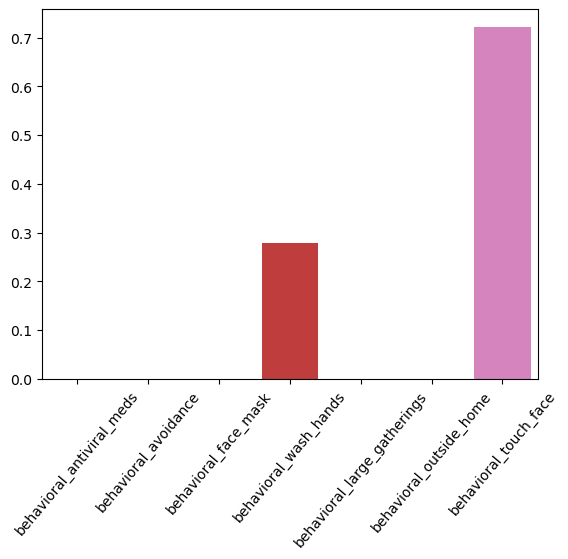

In [46]:
# Showing feature importances by the Decision Tree
sns.barplot(x = bh_dropped.columns[:7], y = tree_clf.feature_importances_)
plt.xticks(rotation = 50)
plt.show()

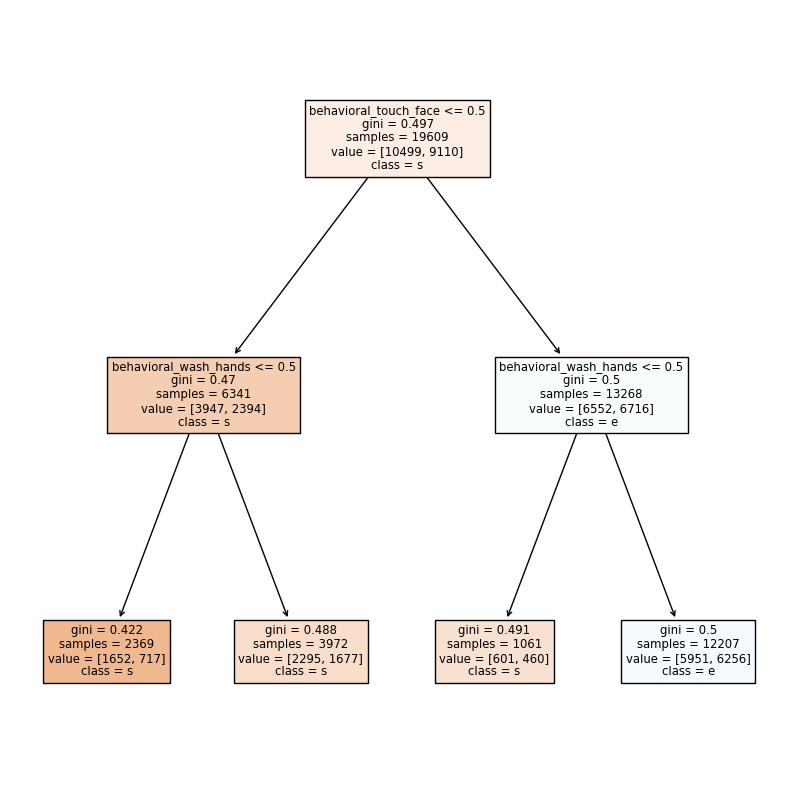

In [43]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, feature_names = list(bh_dropped.columns[:7]), class_names = list(bh_dropped.columns[7]), filled = True );

## Decision tree for opinion variables

In [78]:
op_df = df[opinion + ['seasonal_vaccine']]

In [79]:
op_dropped = op_df.dropna()

In [94]:
X = op_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = op_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 70.91216735886786


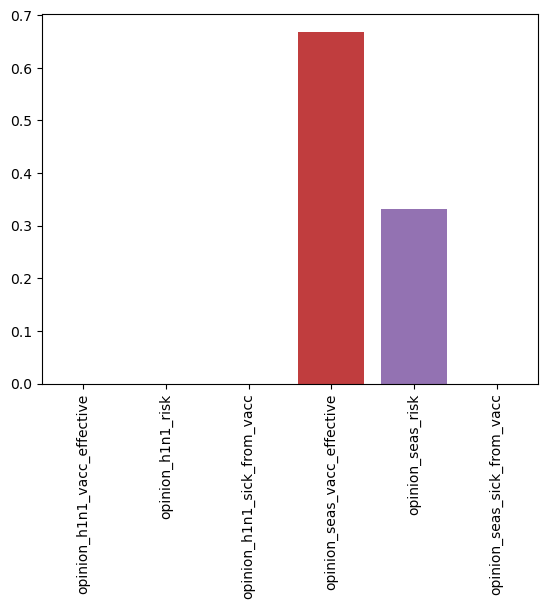

In [81]:
# Showing feature importances by the Decision Tree
sns.barplot(x = op_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

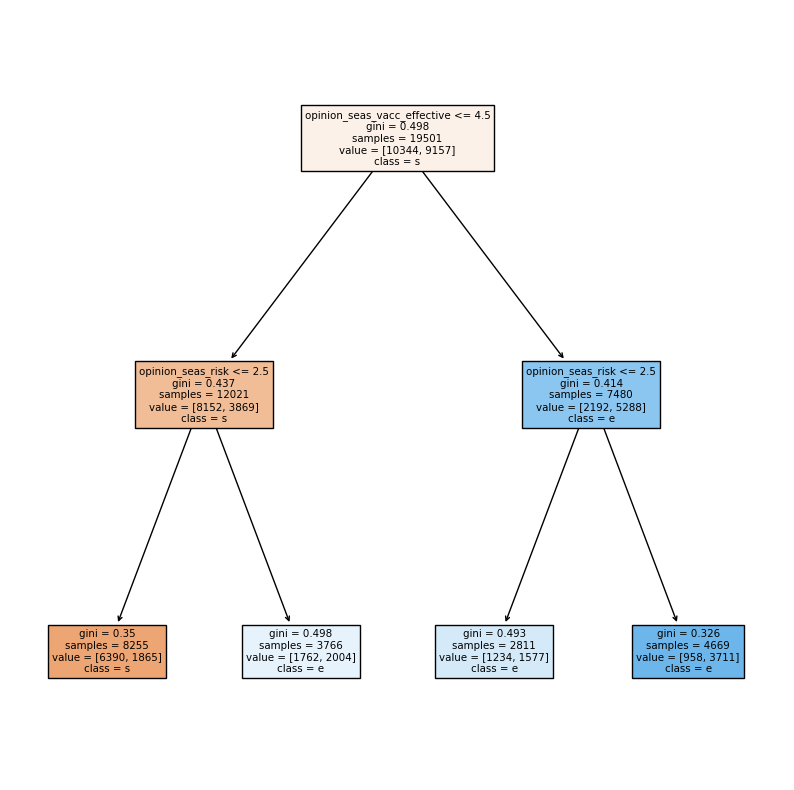

In [67]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, feature_names = list(op_dropped.columns[:-1]), class_names = list(op_dropped.columns[-1]), filled = True );

## Decision tree for extra variables

In [62]:
et_df = df[extra + ['seasonal_vaccine']]

In [64]:
et_dropped = et_df.dropna()

In [97]:
X = et_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = et_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 68.21259309410969


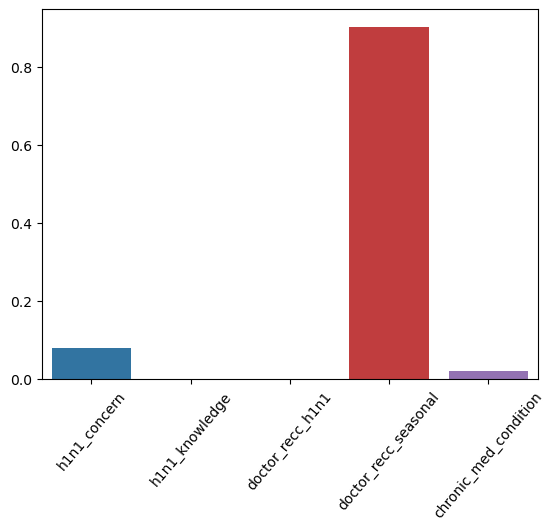

In [69]:
# Showing feature importances by the Decision Tree
sns.barplot(x = et_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 50)
plt.show()

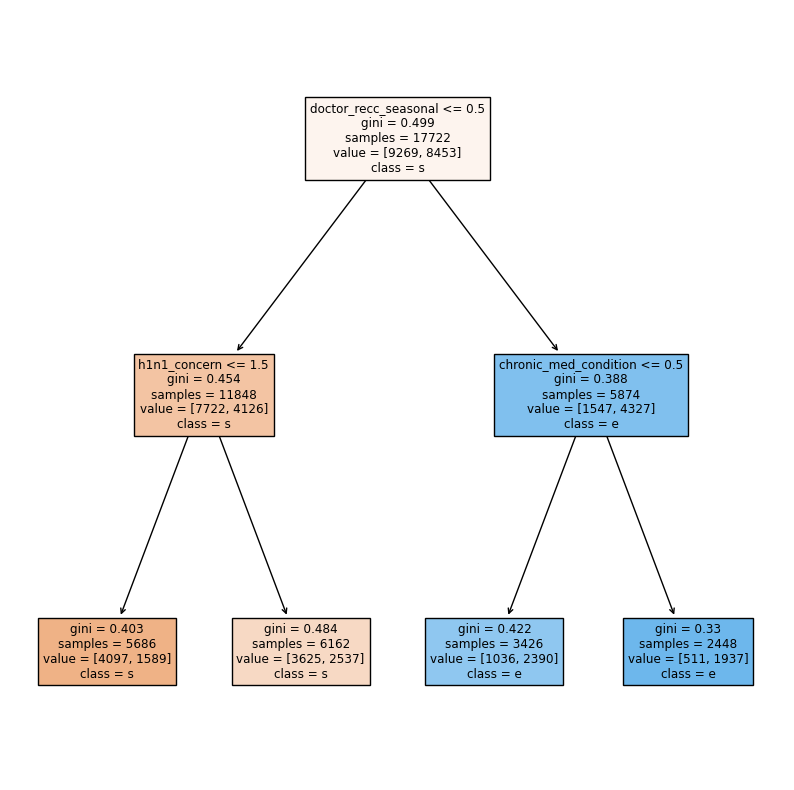

In [70]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, feature_names = list(et_dropped.columns[:-1]), class_names = list(et_dropped.columns[-1]), filled = True );

## Decision tree of behavioral, opinion, and extra

In [98]:
boe_df = df[behavioral+opinion+extra+['seasonal_vaccine']]

In [99]:
boe_dropped = boe_df.dropna()

In [114]:
X = boe_dropped.drop(labels = ['seasonal_vaccine'], axis = 1)
y = boe_dropped['seasonal_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# Fit to train samples
tree_clf.fit(X_train, y_train)

# Predict using X_test
y_pred = tree_clf.predict(X_test)

# Evaluate the model by accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 74.63177958759314


In [116]:
boe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   opinion_h1n1_vacc_effective  26316 non-null  float64
 8   opinion_h1n1_risk            26319 non-null  float64
 9   opinion_h1n1_sick_from_vacc  26312 non-null  float64
 10  opinion_seas_vacc_effective  26245 non-null  float64
 11  opinion_seas_risk            26193 non-null  float64
 12  opinion_seas_sick_from_vacc  26170 non-null  float64
 13  h1n1_concern         

In [117]:
boe_df['doctor_recc_seasonal'].value_counts()

doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64

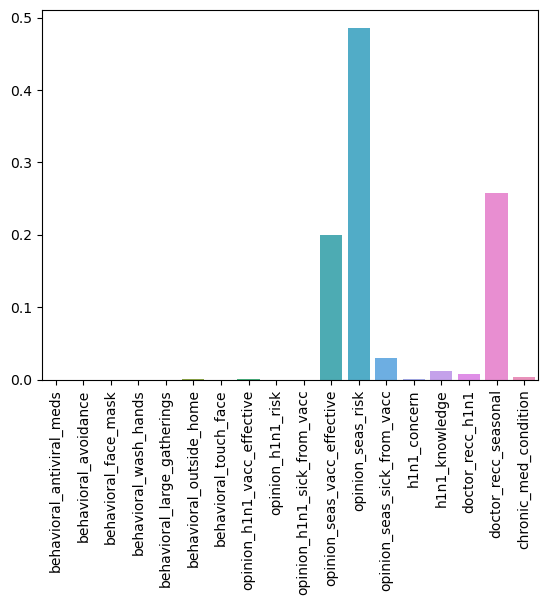

In [115]:
# Showing feature importances by the Decision Tree
sns.barplot(x = boe_dropped.columns[:-1], y = tree_clf.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

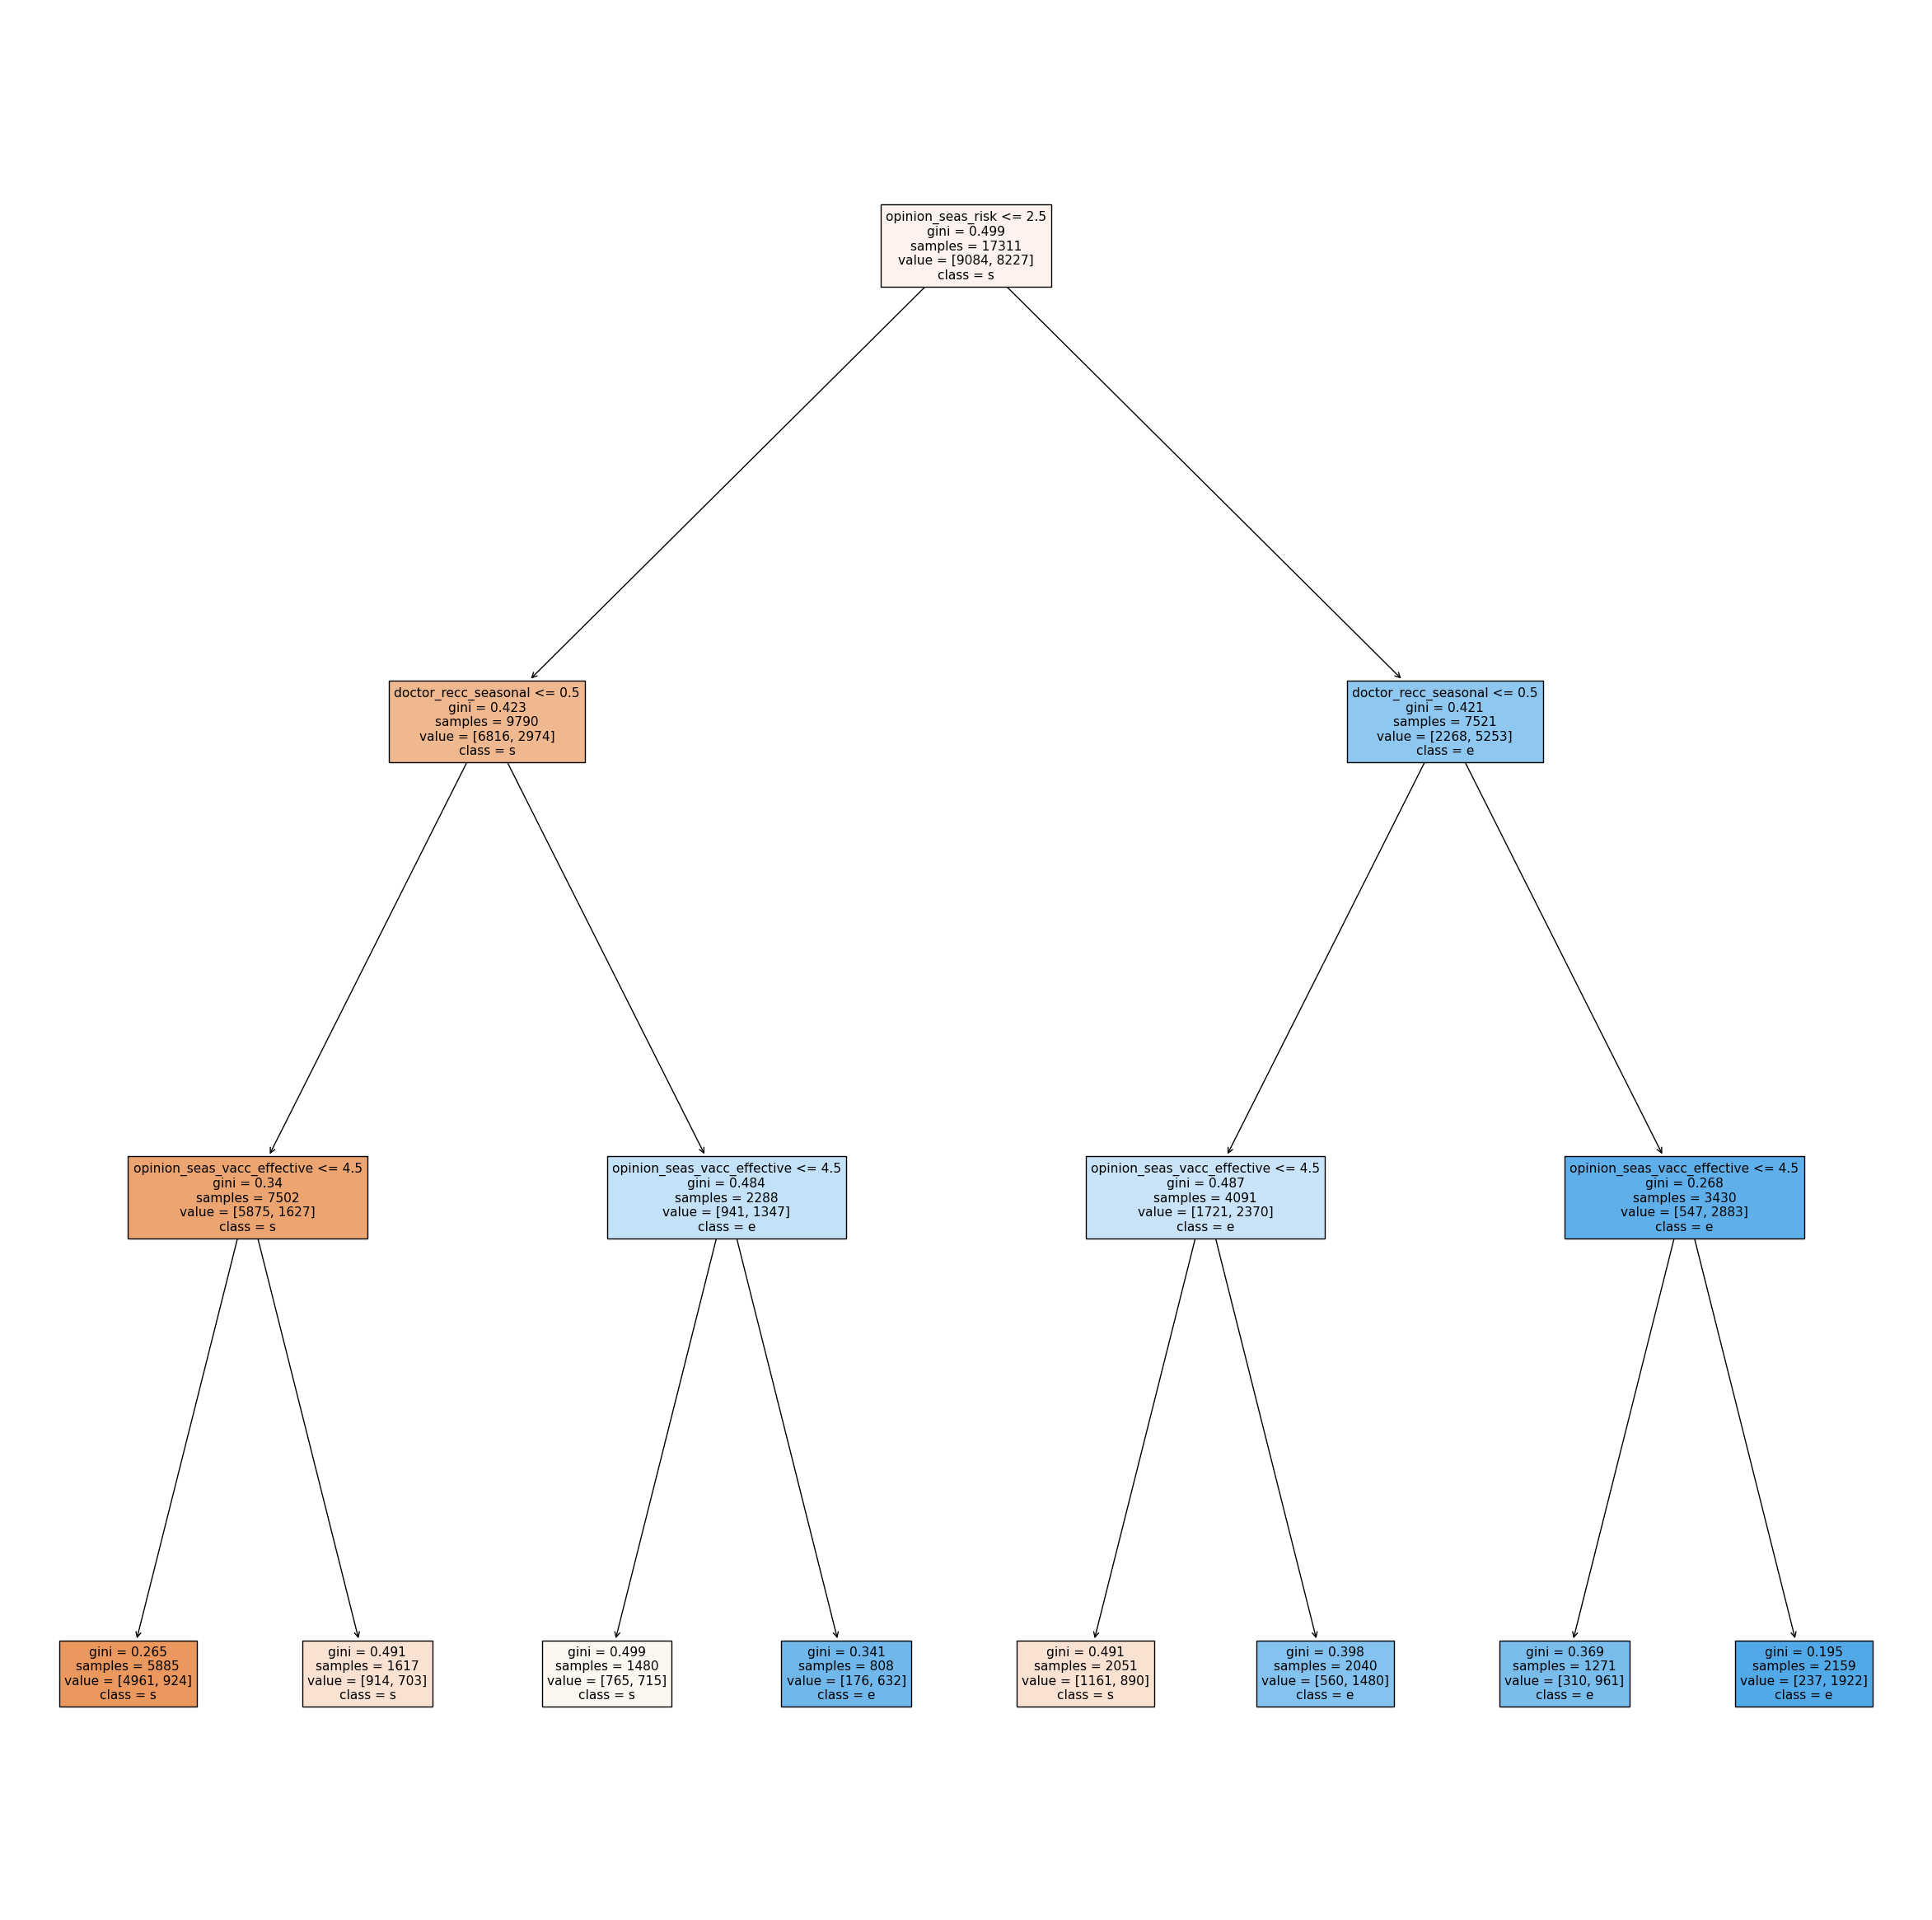

In [108]:
# Showing the Decision Tree
f, ax = plt.subplots(figsize = (30,30))
plot_tree(tree_clf, feature_names = list(boe_dropped.columns[:-1]), class_names = list(boe_dropped.columns[-1]), filled = True );

In [35]:
X_train_encoded = ohe.fit_transform(X_train)

In [36]:
X_test_encoded = ohe.transform(X_test)


In [18]:
X_train.shape

(20030, 36)

In [19]:
X_test.shape

(6677, 36)

In [45]:
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_clf.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [46]:
y_pred = tree_clf.predict(X_test_encoded)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [47]:
acc = accuracy_score(y_test, y_pred) * 100

Accuracy: 73.5060655983226


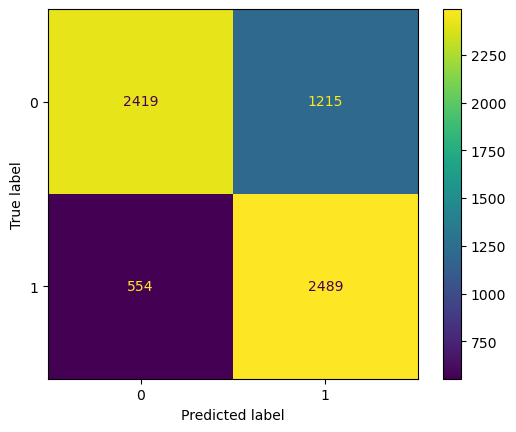

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

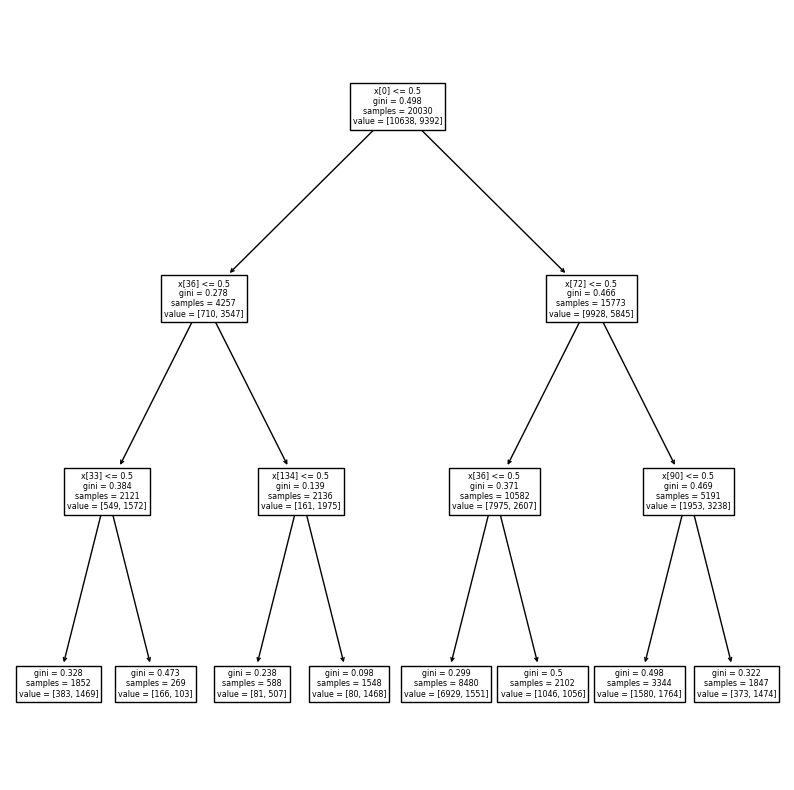

In [50]:
f, ax = plt.subplots(figsize = (10,10))
plot_tree(tree_clf, ax = ax);

In [ ]:
feature_used = X_train_encoded.feature_names

In [51]:
for fi, feature in zip(tree_clf.feature_importances_, feature_used):
    print(fi, feature)

NameError: name 'feature_used' is not defined

In [52]:
X_train_encoded.feature_names

AttributeError: 'csr_matrix' object has no attribute 'feature_names'

In [53]:
ohe.get_feature_names_out(X_train_encoded)

ValueError: input_features is not equal to feature_names_in_